[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-02-store-input)

## 상가(상권)정보 분석하기
* 데이터 출처 : [공공데이터포털](https://www.data.go.kr/dataset/15012005/fileData.do)
* 소상공인 상권정보 상가업소 데이터
* 영상에 사용한 데이터셋 다운로드 : http://bit.ly/open-data-set-folder

### 데이터셋을 엑셀에서 열어보는 방법

```
MS엑셀(Excel)에서 UTF-8로 된 CSV파일 불러오기 
 ◦  기존 euc-kr 데이터 추출형식으로 인해 업소명 오류가 발견되었으며 이를 개선하고자 UTF-8 형식으로 추출하였습니다.
 ◦ 개발자가 아닌 일반사용자의 경우 euc-kr(UTF-8 이나 UTF-16)이 아닌 CSV파일을 엑셀에서 바로 열면 한글이 모두 깨지게 됩니다.
 
 ◦ 바로 열지 마시고 다음 절차를 거치시기 바랍니다. 
   - 엑셀을 실행하고 데이터 → 텍스트를 선택합니다.
   - 가져올 파일을 선택하고 확인을 클릭합니다.
   - 콤보 박스에서 적절한 코드 타입이 선택됐는지 확인합니다. 
     * UTF-8의 코드 페이지 넘버는 65001입니다.
 
   - 원본 데이터 파일 유형을 ‘구분 기호로 분리됨’ 선택합니다. 
   - 기타 ‘|’(파이프) 입력, 3단계 텍스트로 선택합니다.  
     * 단, 지번코드, 건물관리번호, 신우편번호, 경도, 위도 등 행마다 텍스트 선택   
  
``` 

### 데이터셋 분류 지역
* 이 튜토리얼에서는 1번 파일만 사용합니다.

```
※ 파일데이터 분류 지역 
1 : 서울, 부산
2 : 대구, 인천, 광주, 대전, 울산
3 : 경기, 강원, 충북
4 : 충남, 전북, 전남, 경북, 경남, 제주
```

## 라이브러리 로드

In [23]:
# 라이브러리를 로드합니다.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## 한글폰트 설정

In [24]:
# 한글폰트를 설정합니다.
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [25]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### 한글폰트 설정 확인

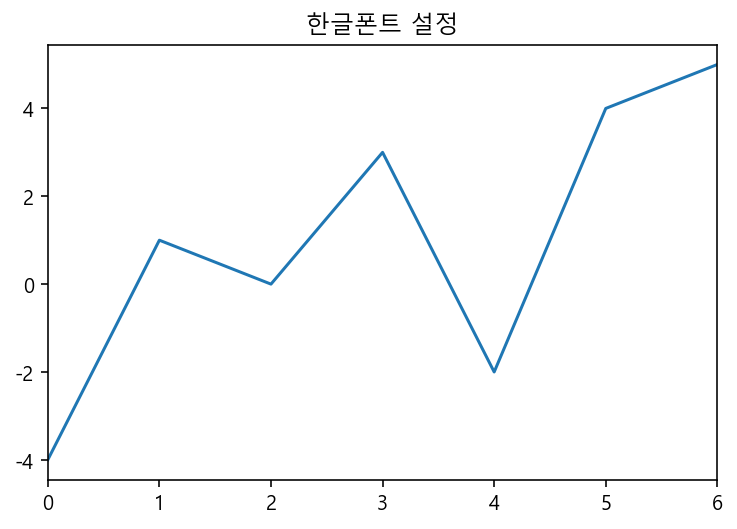

In [26]:
pd.Series([-4, 1, 0, 3, -2, 4, 5]).plot(title="한글폰트 설정")

## 파일로드

In [27]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 0265-F6D2

 C:\Users\이승익\Desktop\kaggle\store\data 디렉터리

2021-08-24  오후 05:52    <DIR>          .
2021-08-24  오후 05:52    <DIR>          ..
2021-07-27  오후 08:30             1,011 [필독]파일열람방법.txt
2021-07-28  오후 02:11        53,995,435 소상공인시장진흥공단_상가(상권)정보_강원_202106.csv
2021-07-28  오후 02:11       266,253,361 소상공인시장진흥공단_상가(상권)정보_경기_202106.csv
2021-07-28  오후 02:13        85,891,807 소상공인시장진흥공단_상가(상권)정보_경남_202106.csv
2021-07-28  오후 02:13        72,847,876 소상공인시장진흥공단_상가(상권)정보_경북_202106.csv
2021-07-28  오후 02:13        35,262,319 소상공인시장진흥공단_상가(상권)정보_광주_202106.csv
2021-07-28  오후 02:13        51,933,488 소상공인시장진흥공단_상가(상권)정보_대구_202106.csv
2021-07-28  오후 02:14        34,544,867 소상공인시장진흥공단_상가(상권)정보_대전_202106.csv
2021-07-28  오후 02:14        72,218,024 소상공인시장진흥공단_상가(상권)정보_부산_202106.csv
2021-07-28  오후 02:14       166,616,658 소상공인시장진흥공단_상가(상권)정보_서울_202106.csv
2021-07-28  오후 02:15         6,698,997 소상공인시장진흥공단_상가(상권)정보_세종_202106.csv
2021-07-28  오후 02:15        23,100,627 소상

In [149]:
# 파일을 로드합니다.

df = pd.read_csv("data/소상공인시장진흥공단_상가(상권)정보_부산_202106.csv", sep=',')
df.shape

(136517, 39)

In [150]:
# 모든 컬럼이 표시되도록 max_columns 의 수를 지정합니다.
pd.options.display.max_columns = 39

## 미리보기

### head, tail

In [151]:
# head 로 미리보기를 합니다.
df.head()

상가업소번호    상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명 상권업종소분류코드  \
0  17174094   도란도란  NaN         Q       음식       Q01         한식    Q01A01   
1  23206623    미광장  NaN         O       숙박       O02  모텔/여관/여인숙    O02A01   
2  20418637  BHC치킨  동래점         Q       음식       Q05     닭/오리요리    Q05A08   
3  24659633    스텔라  NaN         D       소매       D05       의복의류    D05A01   
4  17175332   정성밥상  NaN         Q       음식       Q01         한식    Q01A01   

    상권업종소분류명 표준산업분류코드         표준산업분류명  시도코드    시도명  시군구코드  시군구명       행정동코드  \
0  한식/백반/한정식   I56111         한식 음식점업    26  부산광역시  26230  부산진구  2623074000   
1  모텔/여관/여인숙   I55112             여관업    26  부산광역시  26110    중구  2611056000   
2  후라이드/양념치킨   I56193          치킨 전문점    26  부산광역시  26260   동래구  2626052000   
3       일반의류   G47416  셔츠 및 기타 의복 소매업    26  부산광역시  26500   수영구  2650067000   
4  한식/백반/한정식   I56111         한식 음식점업    26  부산광역시  26350  해운대구  2635051000   

   행정동명       법정동코드   법정동명                 지번코드  대지구분코드 대지구분명  지번본번지  지번부번지  \
0  개금1동  2623011100    개금동  2623011100201740004       1    대지    174    4.0   
1   부평동  2611012600  부평동4가  2611012600200250001       1    대지     25    1.0   
2   복산동  2626010500    복천동  2626010500201850000       1    대지    185    NaN   
3  남천2동  2650010500    남천동  2650010500201480004       1    대지    148    4.0   
4   우1동  2635010500     우동  2635010500205520002       1    대지    552    2.0   

                   지번주소         도로명코드                   도로명  건물본번지  건물부번지  \
0  부산광역시 부산진구 개금동 174-4  262304187020  부산광역시 부산진구 가야대로482번길     29    3.0   
1   부산광역시 중구 부평동4가 25-1  261104175163     부산광역시 중구 보수대로44번길      5    NaN   
2     부산광역시 동래구 복천동 185  262604190058    부산광역시 동래구 동래로147번길     18    NaN   
3   부산광역시 수영구 남천동 148-4  265003138005       부산광역시 수영구 광안해변로    100    NaN   
4   부산광역시 해운대구 우동 552-2  263502006010       부산광역시 해운대구 해운대로    635    7.0   

                      건물관리번호    건물명                      도로명주소   구우편번호  \
0  2623011100101740004050547    NaN  부산광역시 부산진구 가야대로482번길 29-3  614813   
1  2611012600100250001004473    NaN        부산광역시 중구 보수대로44번길 5  600074   
2  2626010500101850000016529    NaN      부산광역시 동래구 동래로147번길 18  607020   
3  2650010500101480004001694  비치아파트        부산광역시 수영구 광안해변로 100  613751   
4  2635010500105520002023290    NaN      부산광역시 해운대구 해운대로 635-7  612819   

     신우편번호  동정보  층정보  호정보          경도         위도  
0  47327.0  NaN  NaN  NaN  129.024938  35.151645  
1  48974.0  NaN  NaN  NaN  129.023668  35.100979  
2  47802.0  NaN  NaN  NaN  129.087156  35.205267  
3  48305.0  NaN  NaN  NaN  129.115397  35.143770  
4  48087.0  NaN  NaN  NaN  129.159641  35.164474

In [152]:
# tail 로 미리보기를 합니다.
df.tail()


상가업소번호       상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드      상권업종중분류명  \
136512  21613939     일광카메라  NaN         D       소매       D18  사진/광학/정밀기기소매   
136513  20026231     파워씨마트  NaN         D       소매       D03         종합소매점   
136514  16993458  철마청년협동조합  NaN         Q       음식       Q01            한식   
136515  16993416      소금주방  NaN         Q       음식       Q01            한식   
136516  16982219       에이유  NaN         Q       음식       Q01            한식   

       상권업종소분류코드   상권업종소분류명 표준산업분류코드         표준산업분류명  시도코드    시도명  시군구코드  \
136512    D18A03      카메라판매   G47823  사진기 및 사진용품 소매업    26  부산광역시  26110   
136513    D03A02       수퍼마켓   G47121            슈퍼마켓    26  부산광역시  26320   
136514    Q01A01  한식/백반/한정식   I56111         한식 음식점업    26  부산광역시  26350   
136515    Q01A01  한식/백반/한정식   I56111         한식 음식점업    26  부산광역시  26500   
136516    Q01A01  한식/백반/한정식   I56111         한식 음식점업    26  부산광역시  26440   

        시군구명       행정동코드  행정동명       법정동코드   법정동명                 지번코드  \
136512    중구  2611057000   광복동  2611013300  광복동1가  2611013300200170004   
136513    북구  2632052100  구포3동  2632010500    구포동  2632010500212090001   
136514  해운대구  2635052000   우2동  2635010500     우동  2635010500214680001   
136515   수영구  2650080000   민락동  2650010300    민락동  2650010300201460027   
136516   강서구  2644053500  명지1동  2644010400    명지동  2644010400234120001   

        대지구분코드 대지구분명  지번본번지  지번부번지                  지번주소         도로명코드  \
136512       1    대지     17    4.0   부산광역시 중구 광복동1가 17-4  261103125001   
136513       1    대지   1209    1.0   부산광역시 북구 구포동 1209-1  263203132009   
136514       1    대지   1468    1.0  부산광역시 해운대구 우동 1468-1  263503133019   
136515       1    대지    146   27.0  부산광역시 수영구 민락동 146-27  265004214200   
136516       1    대지   3412    1.0  부산광역시 강서구 명지동 3412-1  264403350868   

                      도로명  건물본번지  건물부번지                     건물관리번호        건물명  \
136512       부산광역시 중구 광복로     85    NaN  2611013300100170004007530        NaN   
136513      부산광역시 북구 모분재로     43    NaN  2632010500112090001012804        NaN   
136514    부산광역시 해운대구 센텀서로     20    NaN  2635010500114680000000001  케이엔엔월석아트홀   
136515  부산광역시 수영구 무학로63번길     45    6.0  2650010300101460027018793        NaN   
136516   부산광역시 강서구 명지국제8로    230    NaN  2644010400134120001000001        NaN   

                         도로명주소   구우편번호    신우편번호  동정보  층정보  호정보          경도  \
136512         부산광역시 중구 광복로 85  600031  48952.0  NaN  NaN  NaN  129.034179   
136513        부산광역시 북구 모분재로 43  616090  46619.0  NaN  NaN  NaN  129.005835   
136514      부산광역시 해운대구 센텀서로 20  612022  48058.0  NaN  NaN  NaN  129.129001   
136515  부산광역시 수영구 무학로63번길 45-6  613829  48273.0  NaN  NaN  NaN  129.119690   
136516    부산광역시 강서구 명지국제8로 230  618200  46726.0  NaN  NaN  NaN  128.917833   

               위도  
136512  35.098690  
136513  35.203689  
136514  35.171335  
136515  35.163209  
136516  35.097932

### 인덱스 정보 보기

In [153]:
df.index

RangeIndex(start=0, stop=136517, step=1)

### 컬럼명만 보기

In [154]:
# 컬럼값만 보기
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### info

In [155]:
# info 로 데이터프레임의 정보보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136517 entries, 0 to 136516
Data columns (total 39 columns):
상가업소번호       136517 non-null int64
상호명          136516 non-null object
지점명          18836 non-null object
상권업종대분류코드    136517 non-null object
상권업종대분류명     136517 non-null object
상권업종중분류코드    136517 non-null object
상권업종중분류명     136517 non-null object
상권업종소분류코드    136517 non-null object
상권업종소분류명     136517 non-null object
표준산업분류코드     123662 non-null object
표준산업분류명      123662 non-null object
시도코드         136517 non-null int64
시도명          136517 non-null object
시군구코드        136517 non-null int64
시군구명         136517 non-null object
행정동코드        136517 non-null int64
행정동명         136284 non-null object
법정동코드        136517 non-null int64
법정동명         136517 non-null object
지번코드         136517 non-null int64
대지구분코드       136517 non-null int64
대지구분명        136517 non-null object
지번본번지        136517 non-null int64
지번부번지        116948 non-null float64
지번주소         136517 non-null obje

### 데이터 타입 보기

In [156]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

## 결측치 확인하기

In [157]:
True ==1 

True

In [38]:
# 결측치를 구해서 n 이라는 변수에 담고 재사용 합니다.
n = df.isnull().sum()
n

상가업소번호            0
상호명               1
지점명          117681
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      12855
표준산업분류명       12855
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명            233
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         19569
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        116351
건물관리번호            0
건물명           81715
도로명주소             0
구우편번호             0
신우편번호             8
동정보          121126
층정보           79354
호정보          136517
경도                0
위도                0
dtype: int64

### 결측치 시각화

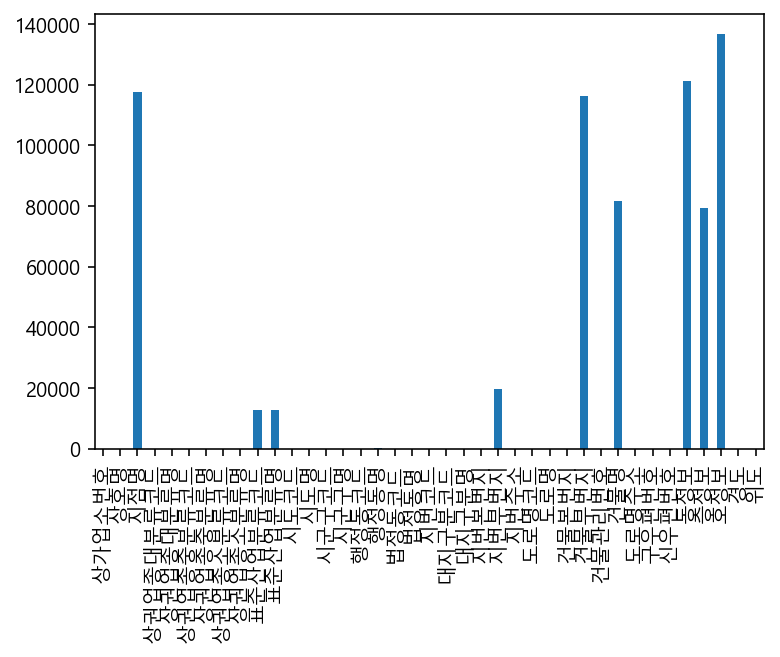

In [39]:
# 막대그래프로 시각화 합니다.
n.plot.bar()

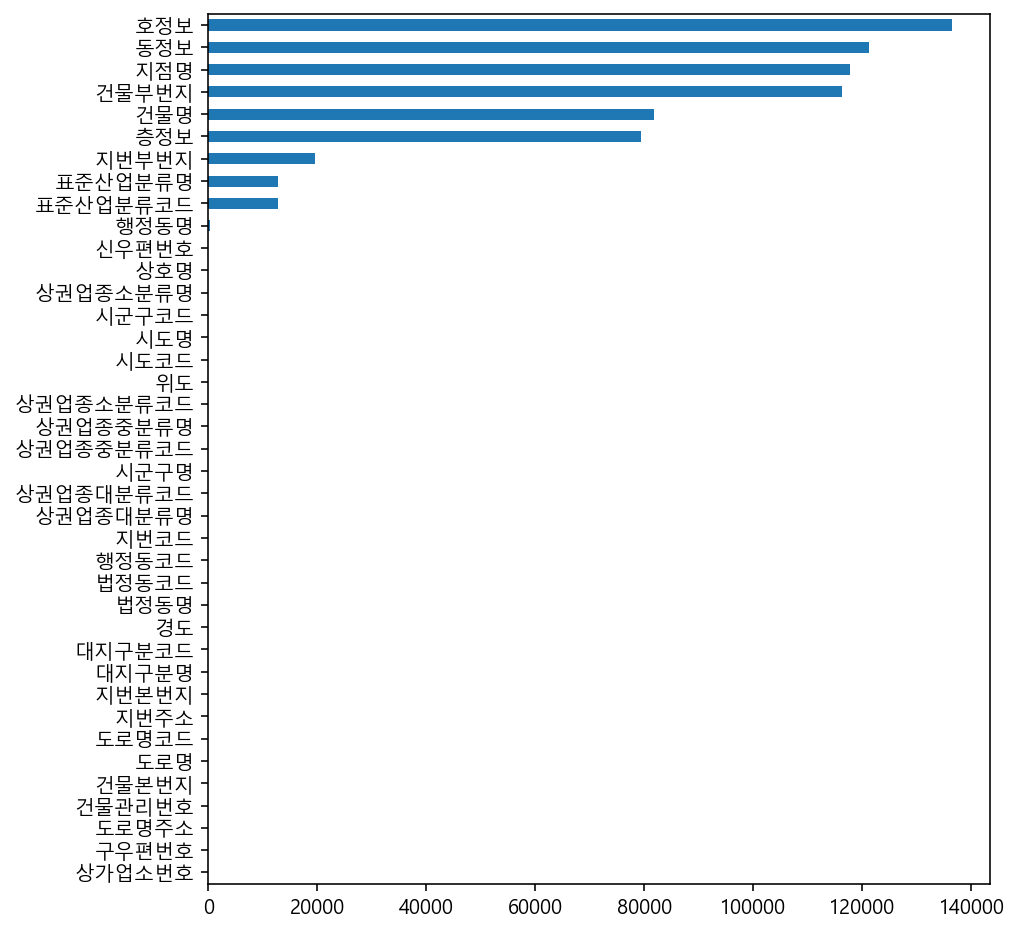

In [40]:
# 값을 정렬해서 결측치가 많은 값이 위에 그려지도록 barh로 그립니다.
n.sort_values().plot.barh(figsize=(7,8))


### missingno 로 결측치 시각화 하기
* 별도의 설치가 필요한 라이브러리 입니다.
* [ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


* 아나콘다에서 설치(다음 3가지 중 하나의 명령어를 사용)
    + conda install -c conda-forge missingno
    + conda install -c conda-forge/label/gcc7 missingno
    + conda install -c conda-forge/label/cf201901 missingno

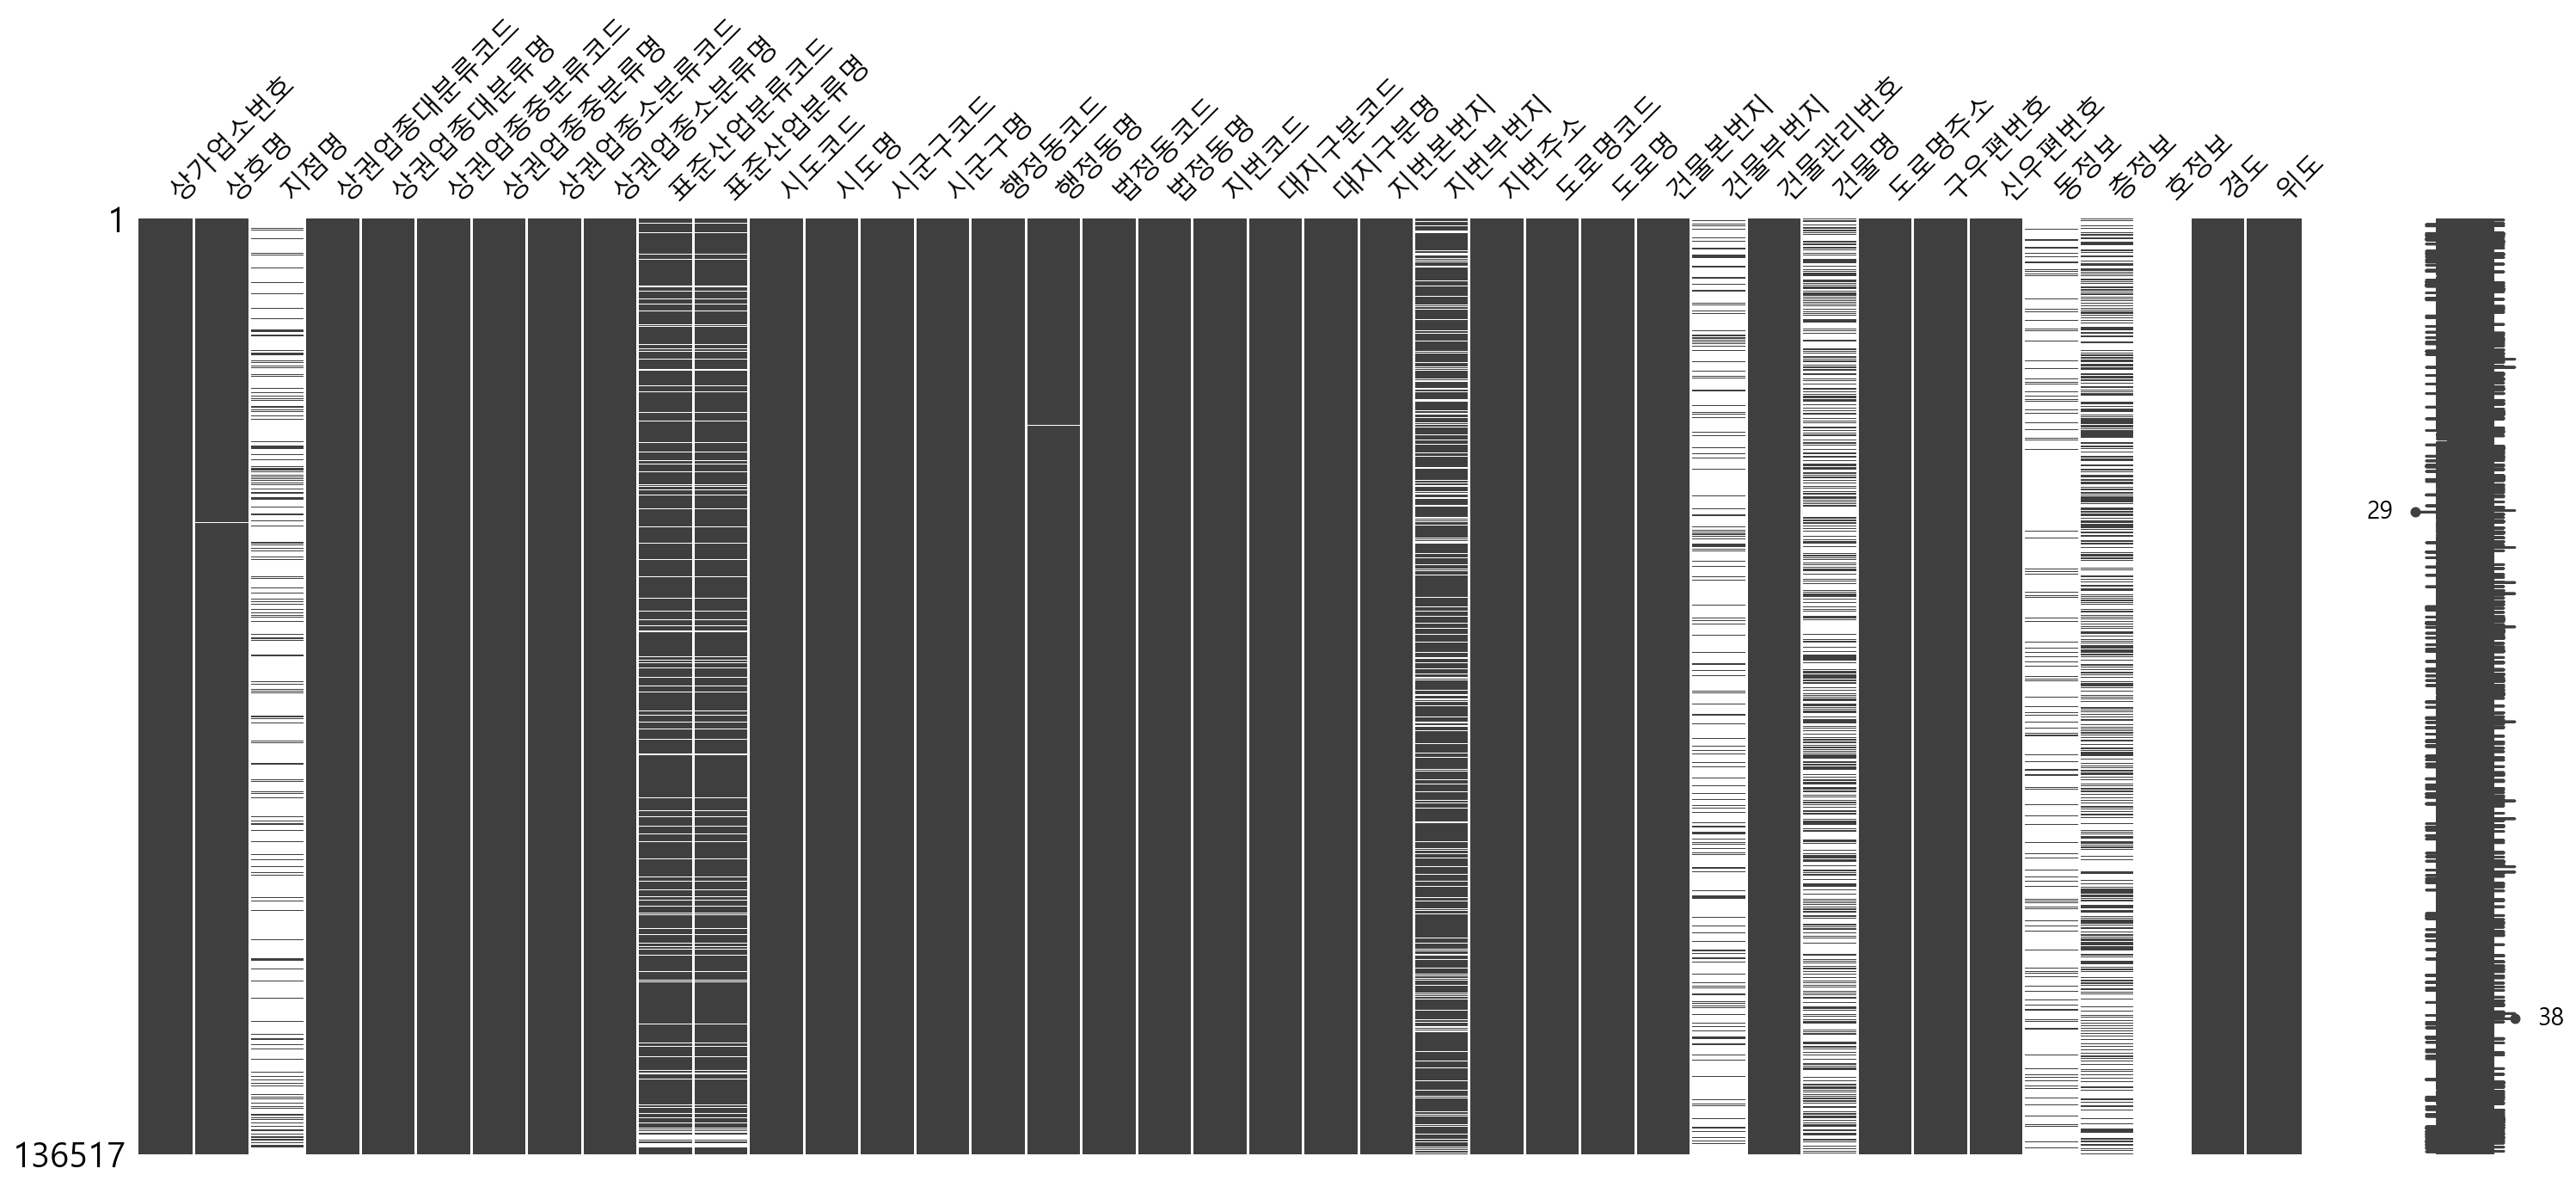

In [41]:
import missingno as msno

msno.matrix(df)

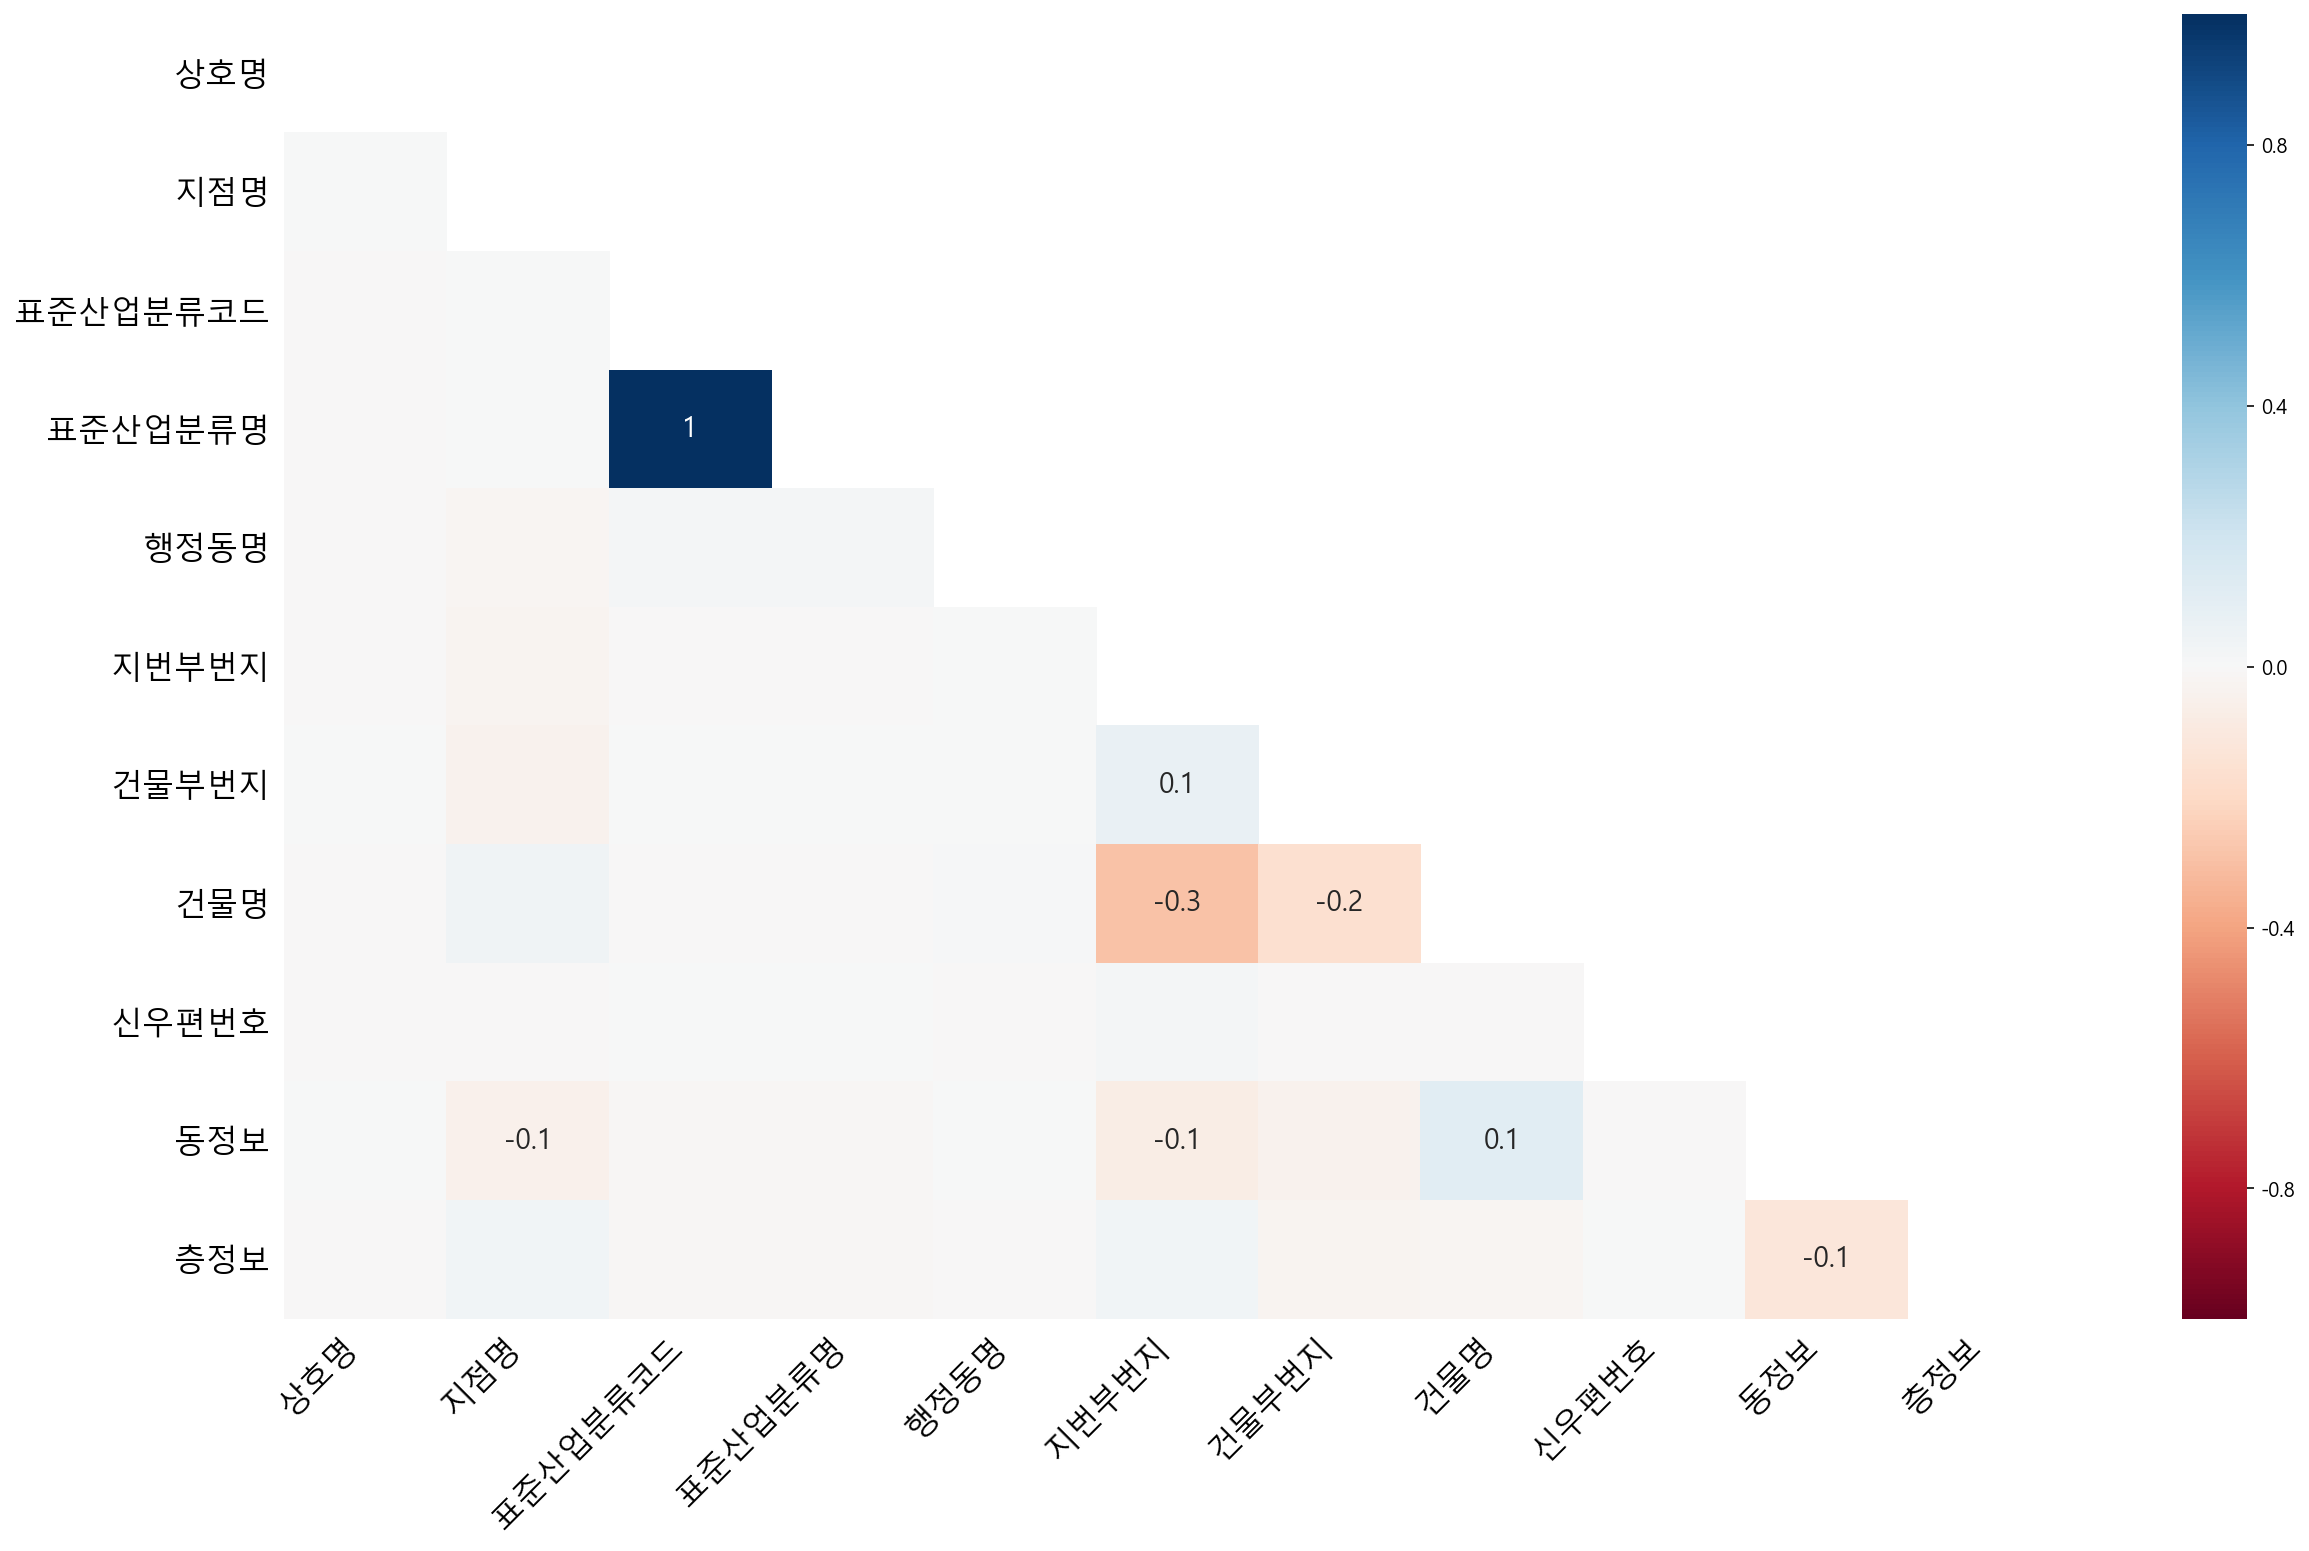

In [42]:
# heatmap 으로 표현합니다.
msno.heatmap(df)

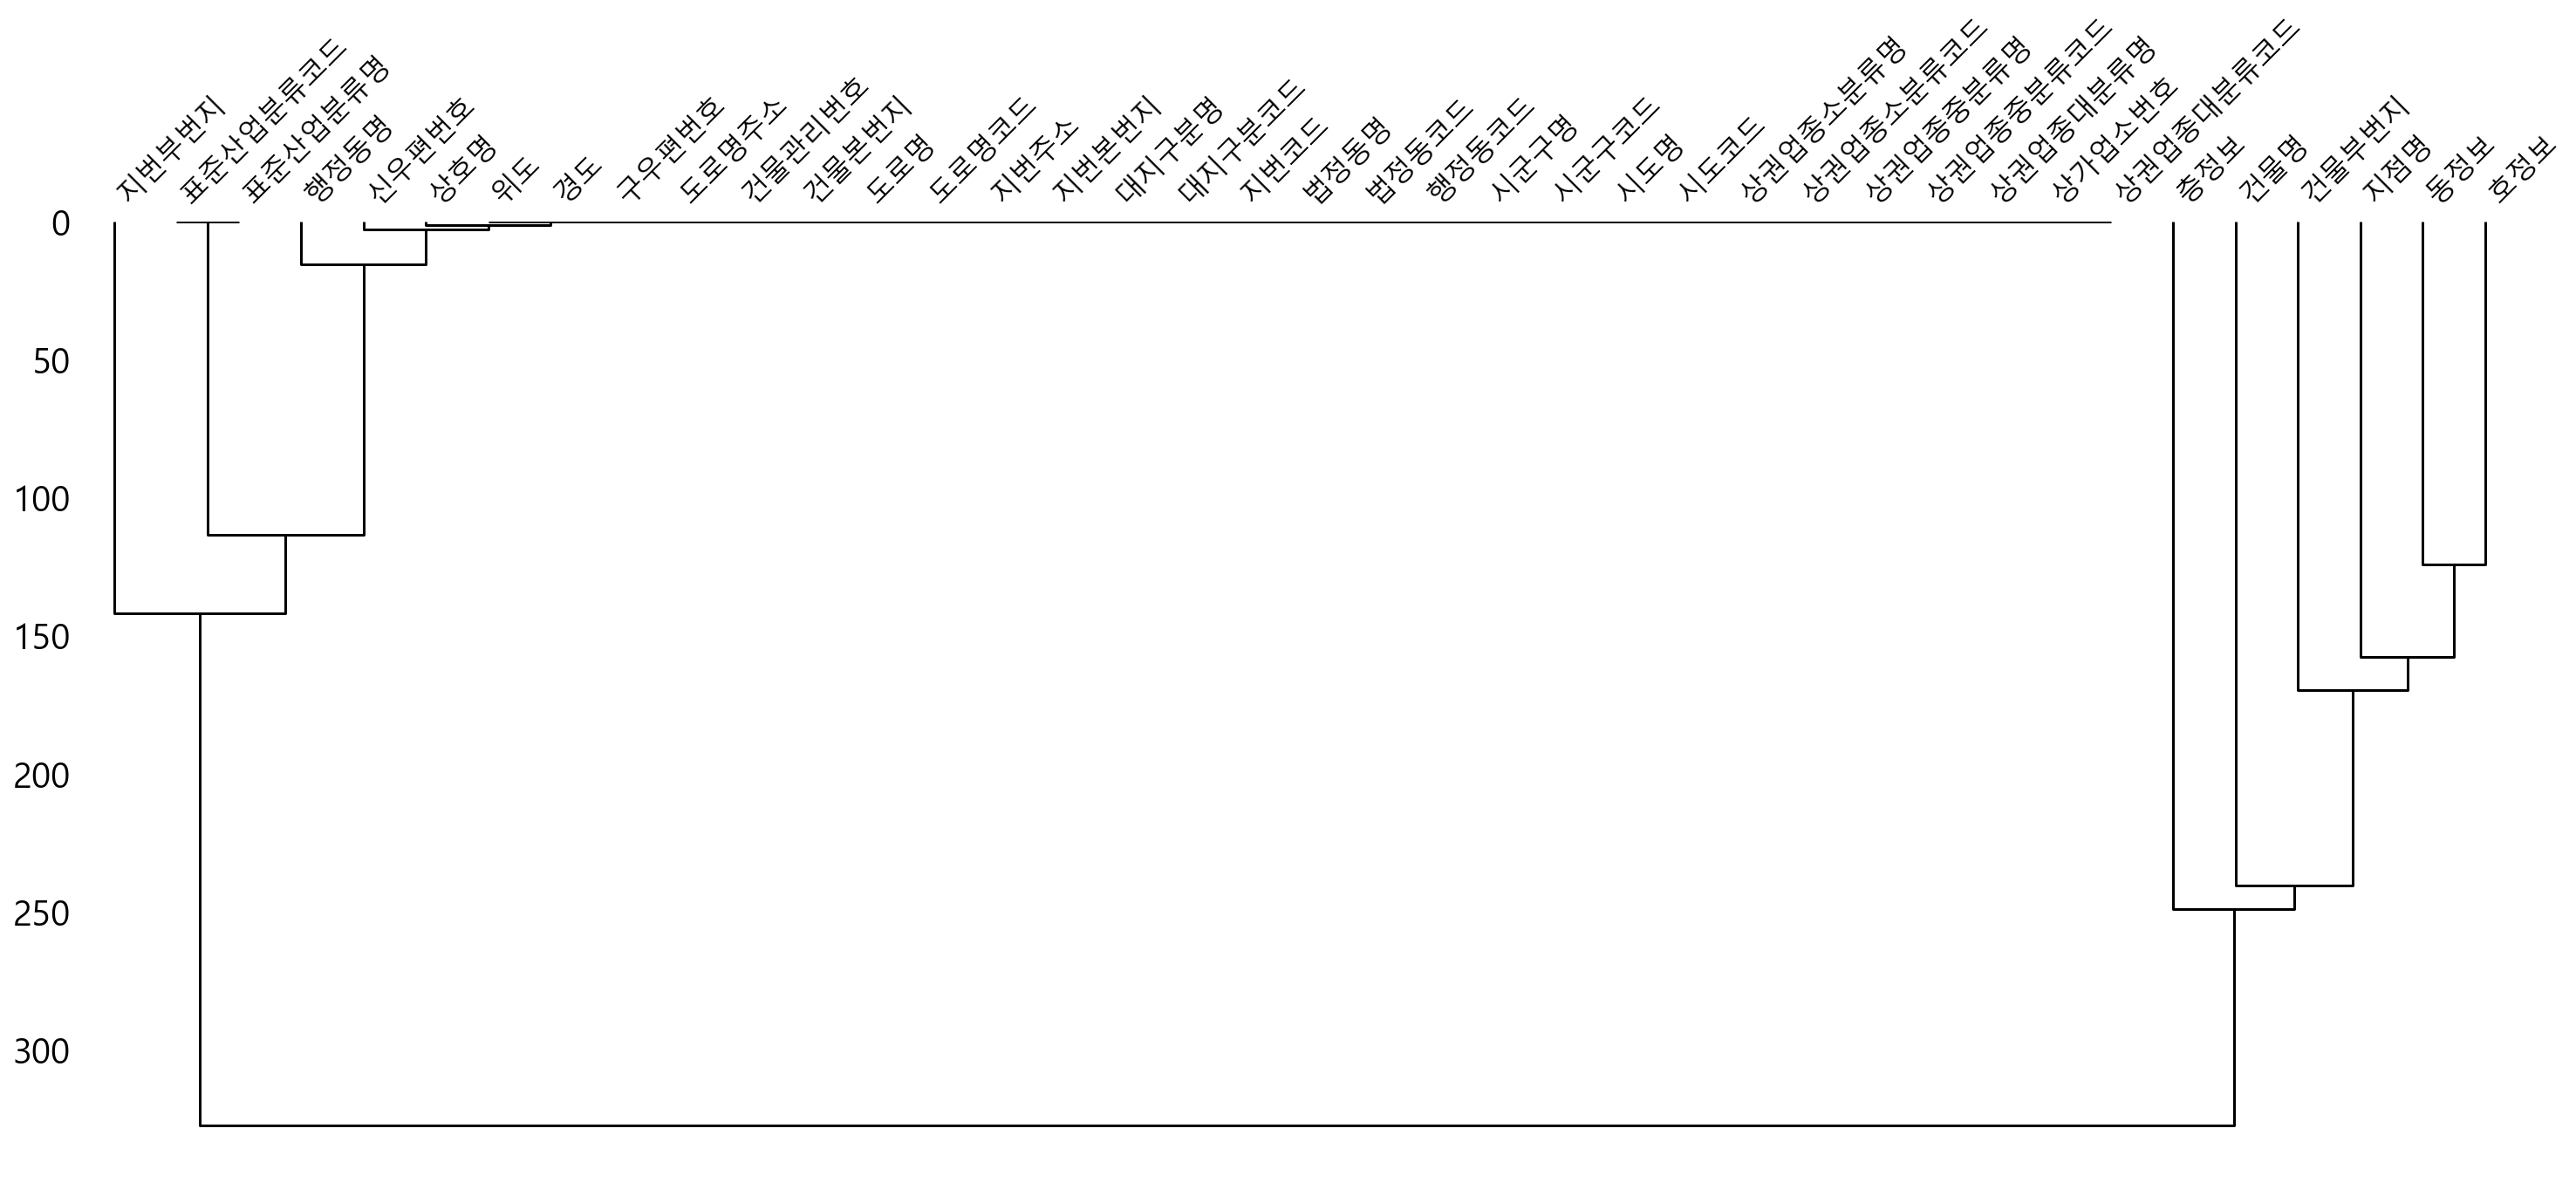

In [43]:
# dendrogram 으로 표현합니다.

msno.dendrogram(df)

## 사용하지 않는 컬럼 제거하기

### 결측치가 너무 많은 컬럼 제거하기

In [44]:
# sort_values 를 통해 결측치가 많은 데이터를 위에서 9개 가져와서 not_use 변수에 담습니다.
# not_use 변수에 담긴 인덱스값만 추출해서 not_use_col 이라는 변수에 담습니다.

not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

Index(['호정보', '동정보', '지점명', '건물부번지', '건물명', '층정보', '지번부번지', '표준산업분류명',
       '표준산업분류코드'],
      dtype='object')

In [45]:
# 사용하지 않는 컬럼을 제거하고 잘 제거가 되었는지 shape 의 수로 확인합니다.
print(df.shape)
df = df.drop(not_use_col, axis=1)
print(df.shape)

(136517, 39)
(136517, 30)


In [46]:
# info()를 통해 해당 컬럼이 제거되었는지 확인하며 메모리 사용량이 줄어들었는지 확인합니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136517 entries, 0 to 136516
Data columns (total 30 columns):
상가업소번호       136517 non-null int64
상호명          136516 non-null object
상권업종대분류코드    136517 non-null object
상권업종대분류명     136517 non-null object
상권업종중분류코드    136517 non-null object
상권업종중분류명     136517 non-null object
상권업종소분류코드    136517 non-null object
상권업종소분류명     136517 non-null object
시도코드         136517 non-null int64
시도명          136517 non-null object
시군구코드        136517 non-null int64
시군구명         136517 non-null object
행정동코드        136517 non-null int64
행정동명         136284 non-null object
법정동코드        136517 non-null int64
법정동명         136517 non-null object
지번코드         136517 non-null int64
대지구분코드       136517 non-null int64
대지구분명        136517 non-null object
지번본번지        136517 non-null int64
지번주소         136517 non-null object
도로명코드        136517 non-null int64
도로명          136517 non-null object
건물본번지        136517 non-null int64
건물관리번호       136517 non-null object

### 사용하지 않는 컬럼 제거하기

In [47]:
# 컬럼명을 전처리 하기 위해 cols 라는 변수에 담습니다.
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [48]:
# 컬럼명에 "코드", "번호"가 있지만 이번 분석에서는 사용하지 않기 때문에 
# 해당되는 컬럼만 찾아와서 cols_code 라는 변수에 담습니다.
cols_code = cols[cols.str.contains("코드|번호")]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [49]:
# "코드", "번호" 가 들어가는 컬럼명만 drop으로 데이터프레임에서 제거합니다.
#  제거 전 후에 shape를 통해 컬럼이 삭제되었는지 확인합니다.
print(df.shape)
df = df.drop(cols_code, axis=1)
print(df.shape)

(136517, 30)
(136517, 16)


In [50]:
# info를 통해 컬럼정보와 메모리 사용량 등을 확인합니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136517 entries, 0 to 136516
Data columns (total 16 columns):
상호명         136516 non-null object
상권업종대분류명    136517 non-null object
상권업종중분류명    136517 non-null object
상권업종소분류명    136517 non-null object
시도명         136517 non-null object
시군구명        136517 non-null object
행정동명        136284 non-null object
법정동명        136517 non-null object
대지구분명       136517 non-null object
지번본번지       136517 non-null int64
지번주소        136517 non-null object
도로명         136517 non-null object
건물본번지       136517 non-null int64
도로명주소       136517 non-null object
경도          136517 non-null float64
위도          136517 non-null float64
dtypes: float64(2), int64(2), object(12)
memory usage: 16.7+ MB


## 행, 열을 기준으로 값을 가져오기

### 열(column)기준 
* df[열이름]
    * 결과가 Pandas 의 Series 형태로 반환
* df[[열목록]] : 2개 이상의 열을 가져올 때는 리스트 형태로 묶어서 지정해주어야 합니다.
    * 결과가 Pandas 의 DataFrame 형태로 반환
    * 1개의 열을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 됩니다.

In [51]:
# "상호명" 컬럼만 가져옵니다.

df["상호명"].head()

0     도란도란
1      미광장
2    BHC치킨
3      스텔라
4     정성밥상
Name: 상호명, dtype: object

In [52]:
# "상호명", "도로명주소" 2개의 컬럼을 가져옵니다.

df[["상호명", '도로명주소']].head()

상호명                      도로명주소
0   도란도란  부산광역시 부산진구 가야대로482번길 29-3
1    미광장        부산광역시 중구 보수대로44번길 5
2  BHC치킨      부산광역시 동래구 동래로147번길 18
3    스텔라        부산광역시 수영구 광안해변로 100
4   정성밥상      부산광역시 해운대구 해운대로 635-7

### 행(row) 기준
* df.loc[행]
* df.loc[행, 열]


* df.loc[행이름 혹은 번호]
    * 결과가 Pandas 의 Series 형태로 반환
* df.loc[[행목록]] : 2개 이상의 행을 가져올 때는 열(column)을 가져올 때와 마찬가지로 리스트 형태로 묶어서 지정해주어야 합니다.
    * 결과가 Pandas 의 DataFrame 형태로 반환
    * 1개의 행을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 됩니다.

In [53]:
# 0 번째 인덱스 행을 가져옵니다.

df.loc[0]

상호명                              도란도란
상권업종대분류명                           음식
상권업종중분류명                           한식
상권업종소분류명                    한식/백반/한정식
시도명                             부산광역시
시군구명                             부산진구
행정동명                             개금1동
법정동명                              개금동
대지구분명                              대지
지번본번지                             174
지번주소             부산광역시 부산진구 개금동 174-4
도로명              부산광역시 부산진구 가야대로482번길
건물본번지                              29
도로명주소       부산광역시 부산진구 가야대로482번길 29-3
경도                            129.025
위도                            35.1516
Name: 0, dtype: object

In [54]:
# 0, 1,2 번째 인덱스 행을 가져옵니다.

df.loc[[0, 1, 2]]

상호명 상권업종대분류명   상권업종중분류명   상권업종소분류명    시도명  시군구명  행정동명   법정동명 대지구분명  \
0   도란도란       음식         한식  한식/백반/한정식  부산광역시  부산진구  개금1동    개금동    대지   
1    미광장       숙박  모텔/여관/여인숙  모텔/여관/여인숙  부산광역시    중구   부평동  부평동4가    대지   
2  BHC치킨       음식     닭/오리요리  후라이드/양념치킨  부산광역시   동래구   복산동    복천동    대지   

   지번본번지                  지번주소                   도로명  건물본번지  \
0    174  부산광역시 부산진구 개금동 174-4  부산광역시 부산진구 가야대로482번길     29   
1     25   부산광역시 중구 부평동4가 25-1     부산광역시 중구 보수대로44번길      5   
2    185     부산광역시 동래구 복천동 185    부산광역시 동래구 동래로147번길     18   

                       도로명주소          경도         위도  
0  부산광역시 부산진구 가야대로482번길 29-3  129.024938  35.151645  
1        부산광역시 중구 보수대로44번길 5  129.023668  35.100979  
2      부산광역시 동래구 동래로147번길 18  129.087156  35.205267

In [55]:
# 0번째 행의 "상호명"을 가져옵니다.
# df.loc[0]["상호명"]
df.loc[0, "상호명"]

'도란도란'

In [56]:
# 0, 1, 2 번째 행의 "상호명"을 가져옵니다.

df.loc[[0,1, 2], "상호명"]

0     도란도란
1      미광장
2    BHC치킨
Name: 상호명, dtype: object

In [57]:
# 0, 1, 2 번째 행의 "상호명", "도로명주소"를 가져옵니다.

df.loc[[0, 1, 2], ["상호명", "도로명주소"]]

상호명                      도로명주소
0   도란도란  부산광역시 부산진구 가야대로482번길 29-3
1    미광장        부산광역시 중구 보수대로44번길 5
2  BHC치킨      부산광역시 동래구 동래로147번길 18

### iloc 로 슬라이싱을 통해 가져오기

* df.iloc[:] 전체 데이터를 가져옵니다.  
* df.iloc[행, 열] 순으로 인덱스 번호를 지정합니다.
* : 은 전체를 의미합니다.
* 시작인덱스:끝나는인덱스+1을 써줍니다. 
    * 예) 3:5 라면 3번째 인덱스 부터 4번째 인덱스까지 가져옵니다.
* : 에서 앞이나 뒤 인덱스를 써주지 않으면 처음부터 혹은 끝까지를 의미합니다.
    * 예) :5 => 처음부터 4번 인덱스까지 가져옵니다.
    * 예) 5: => 5번 인덱스부터 끝까지 가져옵니다.
    * 예) -5: => 뒤에서 5번째 부터 끝까지 가져옵니다.
    * 예) :-5 => 처음부터 5번째 전까지 가져옵니다.

In [58]:
# 위에서 5개의 행과, 왼쪽에서 5개의 열을 가져옵니다.
df.iloc[:5, :5]

상호명 상권업종대분류명   상권업종중분류명   상권업종소분류명    시도명
0   도란도란       음식         한식  한식/백반/한정식  부산광역시
1    미광장       숙박  모텔/여관/여인숙  모텔/여관/여인숙  부산광역시
2  BHC치킨       음식     닭/오리요리  후라이드/양념치킨  부산광역시
3    스텔라       소매       의복의류       일반의류  부산광역시
4   정성밥상       음식         한식  한식/백반/한정식  부산광역시

In [59]:
# 끝에서 5개의 행과, 오른쪽에서 5개의 열을 가져옵니다.

df.iloc[-5:, -5:]

도로명  건물본번지                   도로명주소          경도  \
136512       부산광역시 중구 광복로     85         부산광역시 중구 광복로 85  129.034179   
136513      부산광역시 북구 모분재로     43        부산광역시 북구 모분재로 43  129.005835   
136514    부산광역시 해운대구 센텀서로     20      부산광역시 해운대구 센텀서로 20  129.129001   
136515  부산광역시 수영구 무학로63번길     45  부산광역시 수영구 무학로63번길 45-6  129.119690   
136516   부산광역시 강서구 명지국제8로    230    부산광역시 강서구 명지국제8로 230  128.917833   

               위도  
136512  35.098690  
136513  35.203689  
136514  35.171335  
136515  35.163209  
136516  35.097932

## 기술통계 값 보기

### describe 로 요약하기


* describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
* 기본적으로 수치형 데이터를 요약해서 보여줍니다. 
* include, exclude 옵션으로 데이터 타입에 따른 요약수치를 볼 수 있습니다.
* 데이터의 갯수, 평균, 표준편차, 최솟값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.
* [Descriptive statistics - Wikipedia](https://en.wikipedia.org/wiki/Descriptive_statistics)

In [60]:
# describe 로 기술통계값을 봅니다.
# DataFrame.count: Count number of non-NA/null observations.
# DataFrame.max: Maximum of the values in the object.
# DataFrame.min: Minimum of the values in the object.
# DataFrame.mean: Mean of the values.
# DataFrame.std: Standard deviation of the observations.
# DataFrame.select_dtypes: Subset of a DataFrame including/excluding
#     columns based on their dtype.
df.describe()


지번본번지          건물본번지             경도             위도
count  136517.000000  136517.000000  136517.000000  136517.000000
mean      636.329754     143.692661     129.065149      35.164844
std       646.476327     256.985431       0.069935       0.052968
min         1.000000       1.000000     128.806465      35.006760
25%       175.000000      20.000000     129.020518      35.128847
50%       460.000000      47.000000     129.066283      35.163102
75%       881.000000     134.000000     129.107990      35.197869
max      6530.000000    2571.000000     129.292243      35.385005

In [61]:
# 필요한 컬럼에 대한 요약만 봅니다. 
# 위도, 경도 만 따로 가져와 요약합니다.

df[["위도", "경도"]].describe()

위도             경도
count  136517.000000  136517.000000
mean       35.164844     129.065149
std         0.052968       0.069935
min        35.006760     128.806465
25%        35.128847     129.020518
50%        35.163102     129.066283
75%        35.197869     129.107990
max        35.385005     129.292243

### 개별 기술통계 값 구하기



* [Computational tools — pandas 1.0.1 documentation](https://pandas.pydata.org/docs/user_guide/computation.html#method-summary)

* count 결측치를 제외한 (NaN이 아닌) 값의 갯수를 계산
* min, max 최솟값, 최댓값
* argmin, argmax 최솟값, 최댓값이 위치한 (정수)인덱스를 반환
* idxmin, idxmax 인덱스 중 최솟값, 최댓값을 반환
* quantile 특정 사분위수에 해당하는 값을 반환 (0~1 사이)
    * 0.25 : 1사분위 수
    * 0.5 : 2사분위수 (quantile 의 기본 값)
    * 0.75 : 3사분위수
* sum 수치 데이터의 합계
* mean 평균
* median 중앙값(중간값:데이터를 한 줄로 세웠을 때 가운데 위치하는 값, 중앙값이 짝수일 때는 가운데 2개 값의 평균을 구함)
* mad 평균값으로부터의 절대 편차(absolute deviation)의 평균
* std, var 표준편차, 분산을 계산
* cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0 번째 부터 계속 더해짐)
* cumprod 맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1 번째 부터 계속 곱해짐)

In [62]:
# 결측치를 제외한 (NaN이 아닌) 값의 갯수를 계산
df["위도"].count()

136517

In [63]:
# 평균
df["위도"].mean()

35.164844028454084

In [64]:
# 최댓값
df["위도"].max()

35.3850053405925

In [65]:
# 최솟값
df["위도"].min()

35.0067597383124

In [66]:
# 1사분위 수(25%)
df["위도"].quantile(q=0.25)

35.1288468829732

In [67]:
# 2사분위 수(25%) == 중앙값
df["위도"].quantile()

35.1631017912883

In [68]:
# 중앙값
df["위도"].median()

35.1631017912883

In [69]:
# 중앙값 vs 평균값
df["위도"].mean()

35.164844028454084

In [70]:
# 분산
df["위도"].var()

0.0028056597205506155

* 출처 : [표준 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%91%9C%EC%A4%80_%ED%8E%B8%EC%B0%A8)

표준 편차(標準 偏差, 영어: standard deviation)는 자료의 산포도를 나타내는 수치로, 분산의 양의 제곱근으로 정의된다. 표준편차가 작을수록 평균값에서 변량들의 거리가 가깝다.[1] 통계학과 확률에서 주로 확률의 분포, 확률변수 혹은 측정된 인구나 중복집합을 나타낸다. 일반적으로 모집단의 표준편차는 {\displaystyle \sigma }\sigma (시그마)로, 표본의 표준편차는 {\displaystyle S}S(에스)로 나타낸다.[출처 필요]

편차(deviation)는 관측값에서 평균 또는 중앙값을 뺀 것이다.

분산(variance)은 관측값에서 평균을 뺀 값을 제곱하고, 그것을 모두 더한 후 전체 개수로 나눠서 구한다. 즉, 차이값의 제곱의 평균이다. 관측값에서 평균을 뺀 값인 편차를 모두 더하면 0이 나오므로 제곱해서 더한다.

표준 편차(standard deviation)는 분산을 제곱근한 것이다. 제곱해서 값이 부풀려진 분산을 제곱근해서 다시 원래 크기로 만들어준다.

In [71]:
# 표준편차 => 분산에 root 를 씌운 값입니다.
import numpy as np
np.sqrt(df["위도"].var())


0.05296847855612445

In [72]:
df["위도"].std()

0.05296847855612445

### 단변량 수치형 변수 시각화

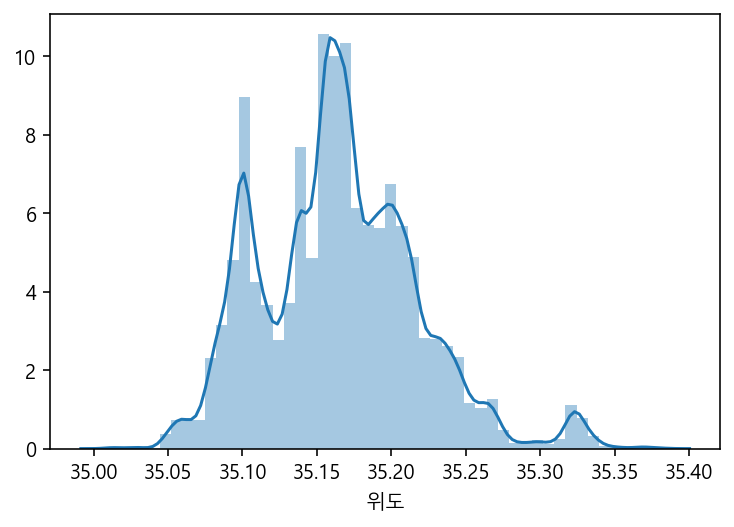

In [73]:
# 위도의 distplot 을 그립니다.
sns.distplot(df["위도"])

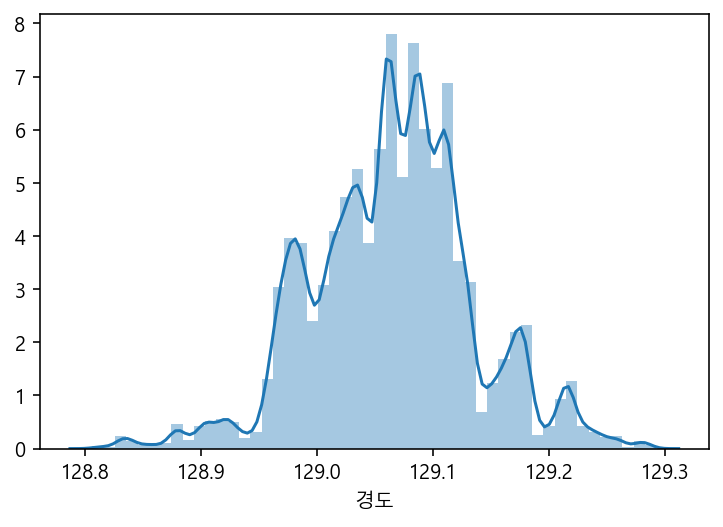

In [74]:
# 경도의 distplot 을 그립니다.
sns.distplot(df["경도"])

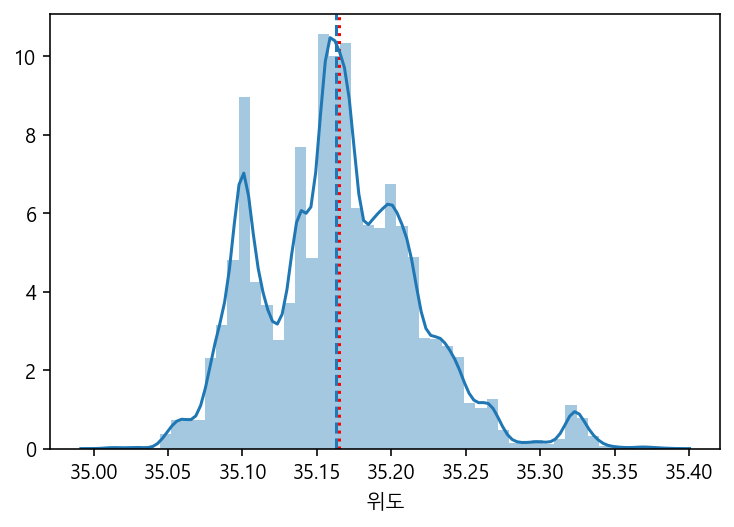

In [75]:
# 위도의 평균, 중앙값을 표현하고 color로 선의 색상을 linestyle 로 점선으로 표시해 봅니다.
plt.axvline(df["위도"].mean(), linestyle=":", color="r")
plt.axvline(df["위도"].median(), linestyle="--")
sns.distplot(df["위도"], )

### 상관계수
* [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)
* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다.
* 결정계수(coefficient of determination) 는 r ** 2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.
    * r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    * r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    * r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    * r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    * r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    * r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    * r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="600">

이미지 출처 : [Correlation and dependence - Wikipedia](https://en.wikipedia.org/wiki/Correlation_and_dependence)

In [76]:
# 각 변수의 상관계수를 구합니다.

corr = df.corr()
corr

지번본번지     건물본번지        경도        위도
지번본번지  1.000000 -0.006547 -0.126951  0.004271
건물본번지 -0.006547  1.000000 -0.001117  0.104987
경도    -0.126951 -0.001117  1.000000  0.534806
위도     0.004271  0.104987  0.534806  1.000000

* 상관계수 시각화 : https://seaborn.pydata.org/examples/many_pairwise_correlations.html

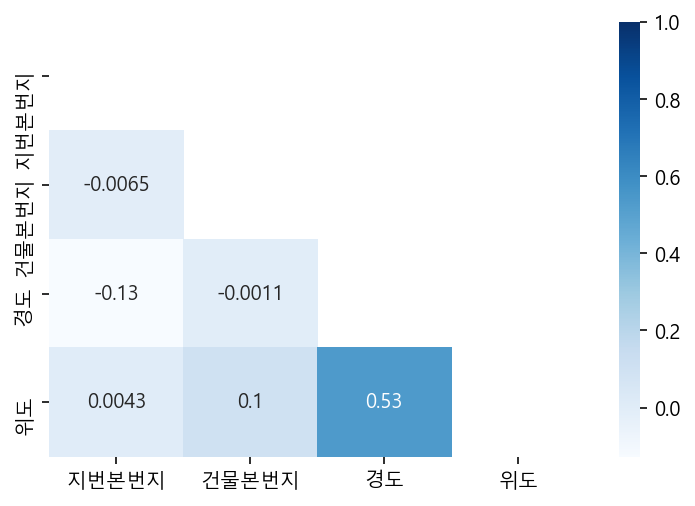

In [77]:
# 위에서 구한 상관계수를 시각화 합니다.
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask)

### 산점도로 이변량 수치형 변수 표현하기

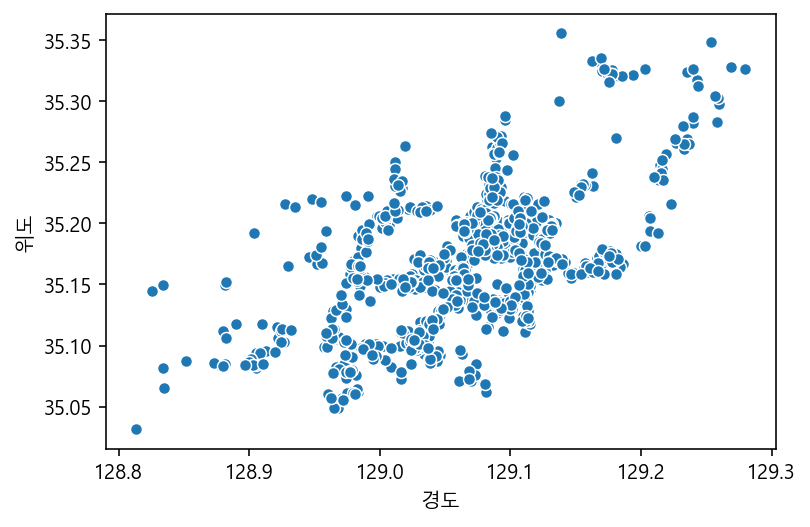

In [78]:
# scatterplot 으로 경도와 위도를 표현하며, 
# 데이터의 갯수가 많으면 오래 걸리기 때문에 1000 개의 샘플을 추출해서 그립니다.

sns.scatterplot(data=df.sample(1000), x="경도", y="위도")

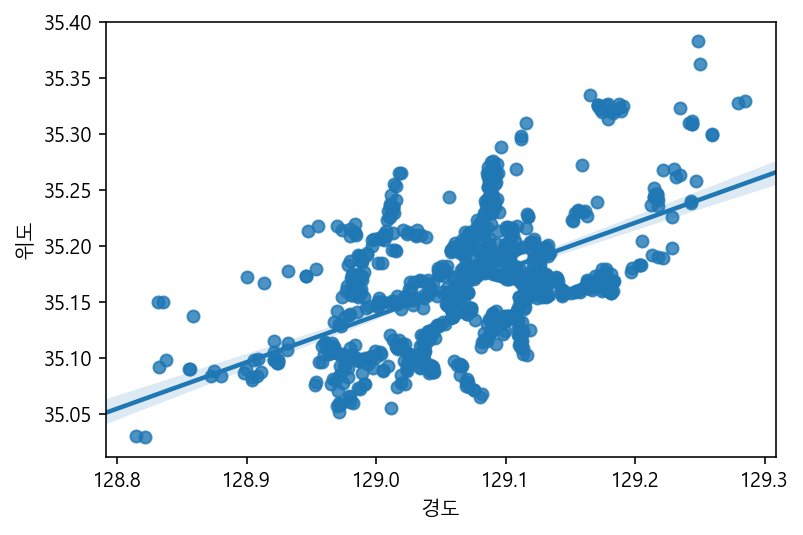

In [79]:
# 위 시각화에서 회귀선을 그립니다.
sns.regplot(data=df.sample(1000), x="경도", y="위도")

[Anscombe’s quartet — seaborn 0.10.0 documentation](https://seaborn.pydata.org/examples/anscombes_quartet.html)

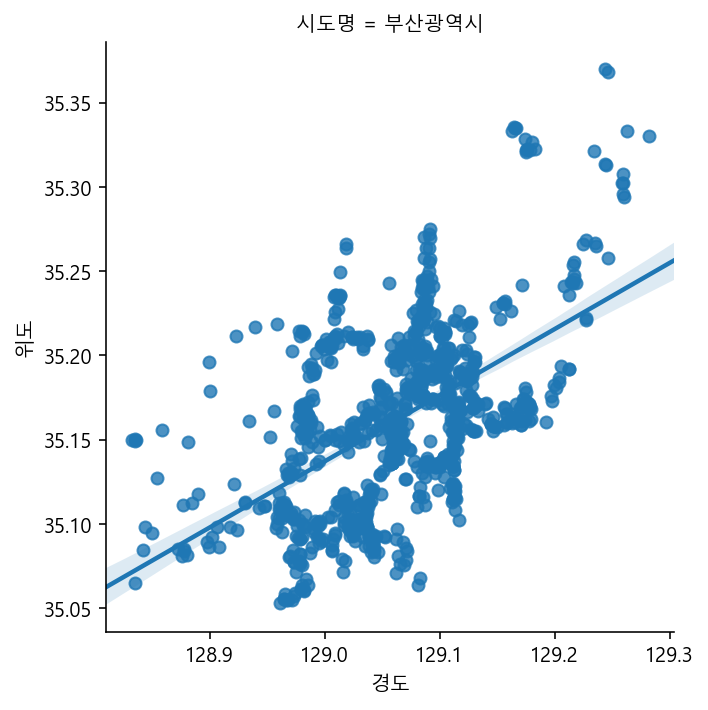

In [80]:
# 회귀선을 그리는 그래프의 서브플롯을 그립니다.
sns.lmplot(data=df.sample(1000), x="경도", y="위도", hue="시도명", col="시도명")

### object 타입의 데이터 요약하기

In [81]:
# include="object" 로 문자열 데이터에 대한 요약을 봅니다.
df.describe(include="object")

상호명 상권업종대분류명 상권업종중분류명   상권업종소분류명     시도명    시군구명    행정동명    법정동명  \
count   136516   136517   136517     136517  136517  136517  136284  136517   
unique  102560        8       88        607       1      16     208     191   
top         CU       음식       한식  한식/백반/한정식   부산광역시    부산진구    부전2동     연산동   
freq       650    49866    17869      11816  136517   17139    3377    6167   

         대지구분명                   지번주소              도로명                도로명주소  
count   136517                 136517           136517               136517  
unique       2                  59051             6004                59452  
top         대지  부산광역시 부산진구 부전동 503-15  부산광역시 부산진구 가야대로  부산광역시 부산진구 가야대로 772  
freq    136138                    984             1644                  984

In [82]:
# 상권업종대분류명 의 요약값을 봅니다.

df["상권업종대분류명"].describe()

count     136517
unique         8
top           음식
freq       49866
Name: 상권업종대분류명, dtype: object

In [83]:
# 상권업종대분류명 의 unique 값을 봅니다.

df["상권업종대분류명"].unique()

array(['음식', '숙박', '소매', '생활서비스', '학문/교육', '관광/여가/오락', '부동산', '스포츠'],
      dtype=object)

In [84]:
# 상권업종대분류명 의 unique 값의 갯수를 세어봅니다.
df["상권업종대분류명"].nunique()

8

In [85]:
df["상권업종대분류명"].mode()

0    음식
dtype: object

### 범주형 변수의 빈도수 구하기

In [86]:
# value_counts 로 상권업종대분류명 의 빈도수를 구합니다.

df["상권업종대분류명"].value_counts()

음식          49866
소매          44740
생활서비스       23722
학문/교육        8462
부동산          4515
관광/여가/오락     2857
숙박           1665
스포츠           690
Name: 상권업종대분류명, dtype: int64

## 인덱싱과 필터로 서브셋 만들기

In [87]:
# "상권업종대분류명" 이 "음식인 데이터만 가져오기
# df_food 라는 변수에 담아줍니다. 서브셋을 새로운 변수에 저장할 때 copy()를 사용하는 것을 권장합니다.

df.shape

(136517, 16)

### 동래구의 상권업종대분류가 음식만 보기

In [90]:
# 시군구명이 "동래구" 인 데이터만 가져옵니다.
df_food = df[df["상권업종대분류명"] == "음식"].copy()
df_food.head()

상호명 상권업종대분류명 상권업종중분류명   상권업종소분류명    시도명  시군구명  행정동명 법정동명 대지구분명  \
0         도란도란       음식       한식  한식/백반/한정식  부산광역시  부산진구  개금1동  개금동    대지   
2        BHC치킨       음식   닭/오리요리  후라이드/양념치킨  부산광역시   동래구   복산동  복천동    대지   
4         정성밥상       음식       한식  한식/백반/한정식  부산광역시  해운대구   우1동   우동    대지   
5  당감제일냉면&토리커피       음식       한식        냉면집  부산광역시   사상구   감전동  감전동    대지   
6        오도씨곱창       음식       한식   곱창/양구이전문  부산광역시   강서구  명지1동  명지동    대지   

   지번본번지                  지번주소                   도로명  건물본번지  \
0    174  부산광역시 부산진구 개금동 174-4  부산광역시 부산진구 가야대로482번길     29   
2    185     부산광역시 동래구 복천동 185    부산광역시 동래구 동래로147번길     18   
4    552   부산광역시 해운대구 우동 552-2       부산광역시 해운대구 해운대로    635   
5    119  부산광역시 사상구 감전동 119-18         부산광역시 사상구 대동로    316   
6   3357  부산광역시 강서구 명지동 3357-7      부산광역시 강서구 명지국제8로    245   

                       도로명주소          경도         위도  
0  부산광역시 부산진구 가야대로482번길 29-3  129.024938  35.151645  
2      부산광역시 동래구 동래로147번길 18  129.087156  35.205267  
4      부산광역시 해운대구 해운대로 635-7  129.159641  35.164474  
5          부산광역시 사상구 대동로 316  128.987253  35.155500  
6       부산광역시 강서구 명지국제8로 245  128.919857  35.098431

In [91]:
# 이번에는 시군구명이 "동래구" 이고 "상권업종대분류명" 이 "음식"인 서브셋을 가져온 후 
# "상권업종중분류명" 별로 빈도수를 구합니다.

df[df["시군구명"] == "동래구"].head()

상호명 상권업종대분류명      상권업종중분류명   상권업종소분류명    시도명 시군구명  행정동명 법정동명 대지구분명  \
2    BHC치킨       음식        닭/오리요리  후라이드/양념치킨  부산광역시  동래구   복산동  복천동    대지   
13      동경       음식            한식  한식/백반/한정식  부산광역시  동래구  온천1동  온천동    대지   
17   대우보일러       소매  철물/난방/건설자재소매      건축백화점  부산광역시  동래구  사직3동  사직동    대지   
20  늘봄커텐장식       소매    가정/주방/인테리어       지물판매  부산광역시  동래구  사직1동  사직동    대지   
21   김극무영어    학문/교육         학원-어학  학원-외국어/어학  부산광역시  동래구  사직2동  사직동    대지   

    지번본번지                 지번주소                 도로명  건물본번지  \
2     185    부산광역시 동래구 복천동 185  부산광역시 동래구 동래로147번길     18   
13     46  부산광역시 동래구 온천동 46-14       부산광역시 동래구 금강로    156   
17      2    부산광역시 동래구 사직동 2-3      부산광역시 동래구 중앙대로   1280   
20     48  부산광역시 동래구 사직동 48-18  부산광역시 동래구 사직북로28번길     25   
21   1017   부산광역시 동래구 사직동 1017       부산광역시 동래구 사직로     80   

                    도로명주소          경도         위도  
2   부산광역시 동래구 동래로147번길 18  129.087156  35.205267  
13      부산광역시 동래구 금강로 156  129.081566  35.222606  
17    부산광역시 동래구 중앙대로 1280  129.078098  35.201274  
20  부산광역시 동래구 사직북로28번길 25  129.061301  35.199106  
21       부산광역시 동래구 사직로 80  129.057535  35.196642

In [92]:
# 위와 똑같이 구하지만 이번에는 loc를 사용합니다.
# loc[행, 열]

df[(df["상권업종대분류명"] == "음식") & (df["시군구명"] == "동래구")]["상권업종중분류명"].value_counts()

한식         1351
커피점/카페      460
유흥주점        404
일식/수산물      341
분식          294
닭/오리요리      190
제과제빵떡케익     141
양식          133
패스트푸드       126
중식          113
별식/퓨전요리      31
부페            8
기타음식업         6
음식배달서비스       4
Name: 상권업종중분류명, dtype: int64

### 구별 음식점 업종 비교하기

In [93]:
# df_seoul_food 에 "시도명"이 "서울특별시" 이고 "상권업종대분류명" 이 "음식" 에 대한 서브셋만 가져와서 담아줍니다.

df_seoul_food = df[(df["시도명"] == "부산광역시") & (df["상권업종대분류명"] == "음식")].copy()
df_seoul_food.shape

(49866, 16)

In [94]:
# "시군구명", "상권업종중분류명" 으로 그룹화 해서 상점수를 세어봅니다.
# 결과를 food_gu 에 담아 재사용할 예정입니다.

food_gu = df_seoul_food.groupby(["시군구명", "상권업종중분류명"])["상호명"].count()
food_gu.head()

시군구명  상권업종중분류명
강서구   기타음식업        47
      닭/오리요리      133
      별식/퓨전요리      29
      부페           15
      분식          186
Name: 상호명, dtype: int64

In [95]:
food_gu.unstack().iloc[:5, :5]

상권업종중분류명  기타음식업  닭/오리요리  별식/퓨전요리    부페     분식
시군구명                                         
강서구        47.0   133.0     29.0  15.0  186.0
금정구        15.0   207.0     23.0   4.0  301.0
기장군        16.0   153.0     39.0  10.0  279.0
남구         11.0   216.0     34.0   6.0  310.0
동구          1.0    78.0      9.0  15.0  155.0

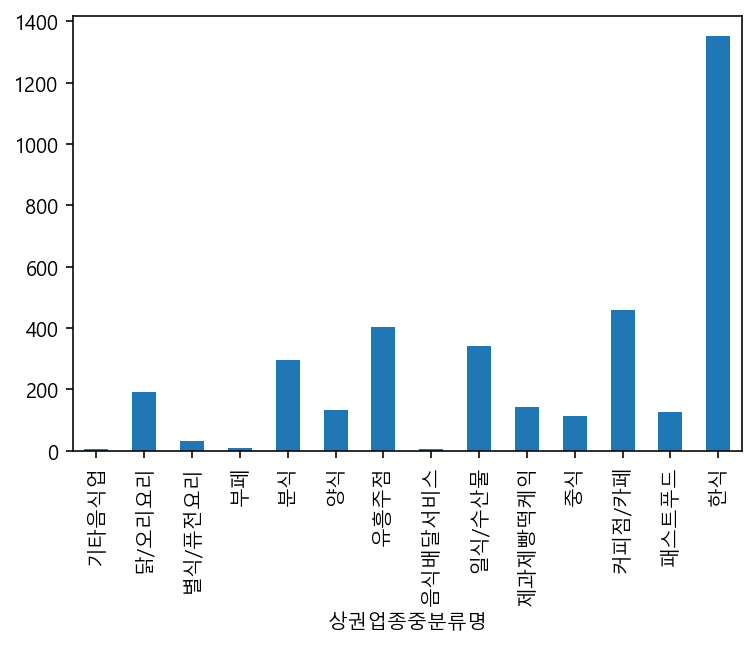

In [96]:
# food_gu 에 담긴 데이터를 시각화 합니다.
# 상권업종중분류명 과 상점수 로 barplot을 그립니다.
food_gu.unstack().loc["동래구"].plot.bar()

In [97]:
food = food_gu.reset_index()
food = food.rename(columns={"상호명":"상호수"})
food.head()

시군구명 상권업종중분류명  상호수
0  강서구    기타음식업   47
1  강서구   닭/오리요리  133
2  강서구  별식/퓨전요리   29
3  강서구       부페   15
4  강서구       분식  186

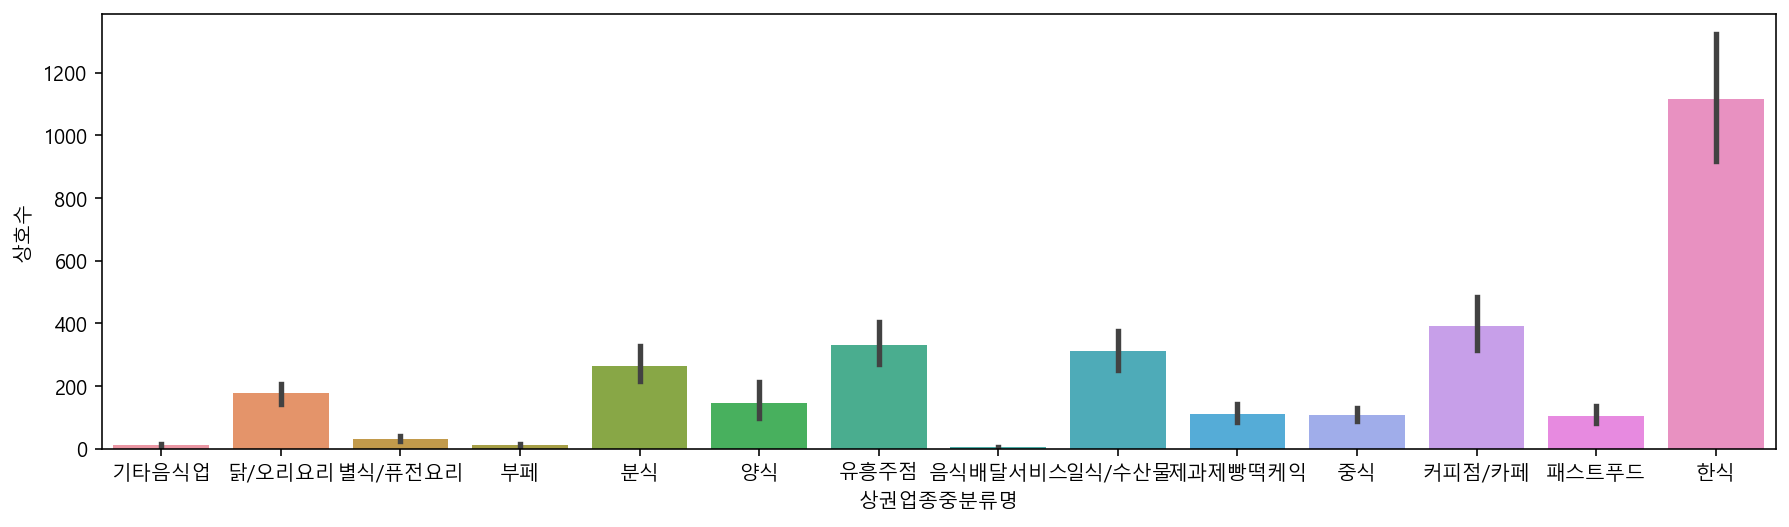

In [98]:
plt.figure(figsize=(15,4))
sns.barplot(data=food, x="상권업종중분류명", y="상호수")

* https://seaborn.pydata.org/tutorial/categorical.html

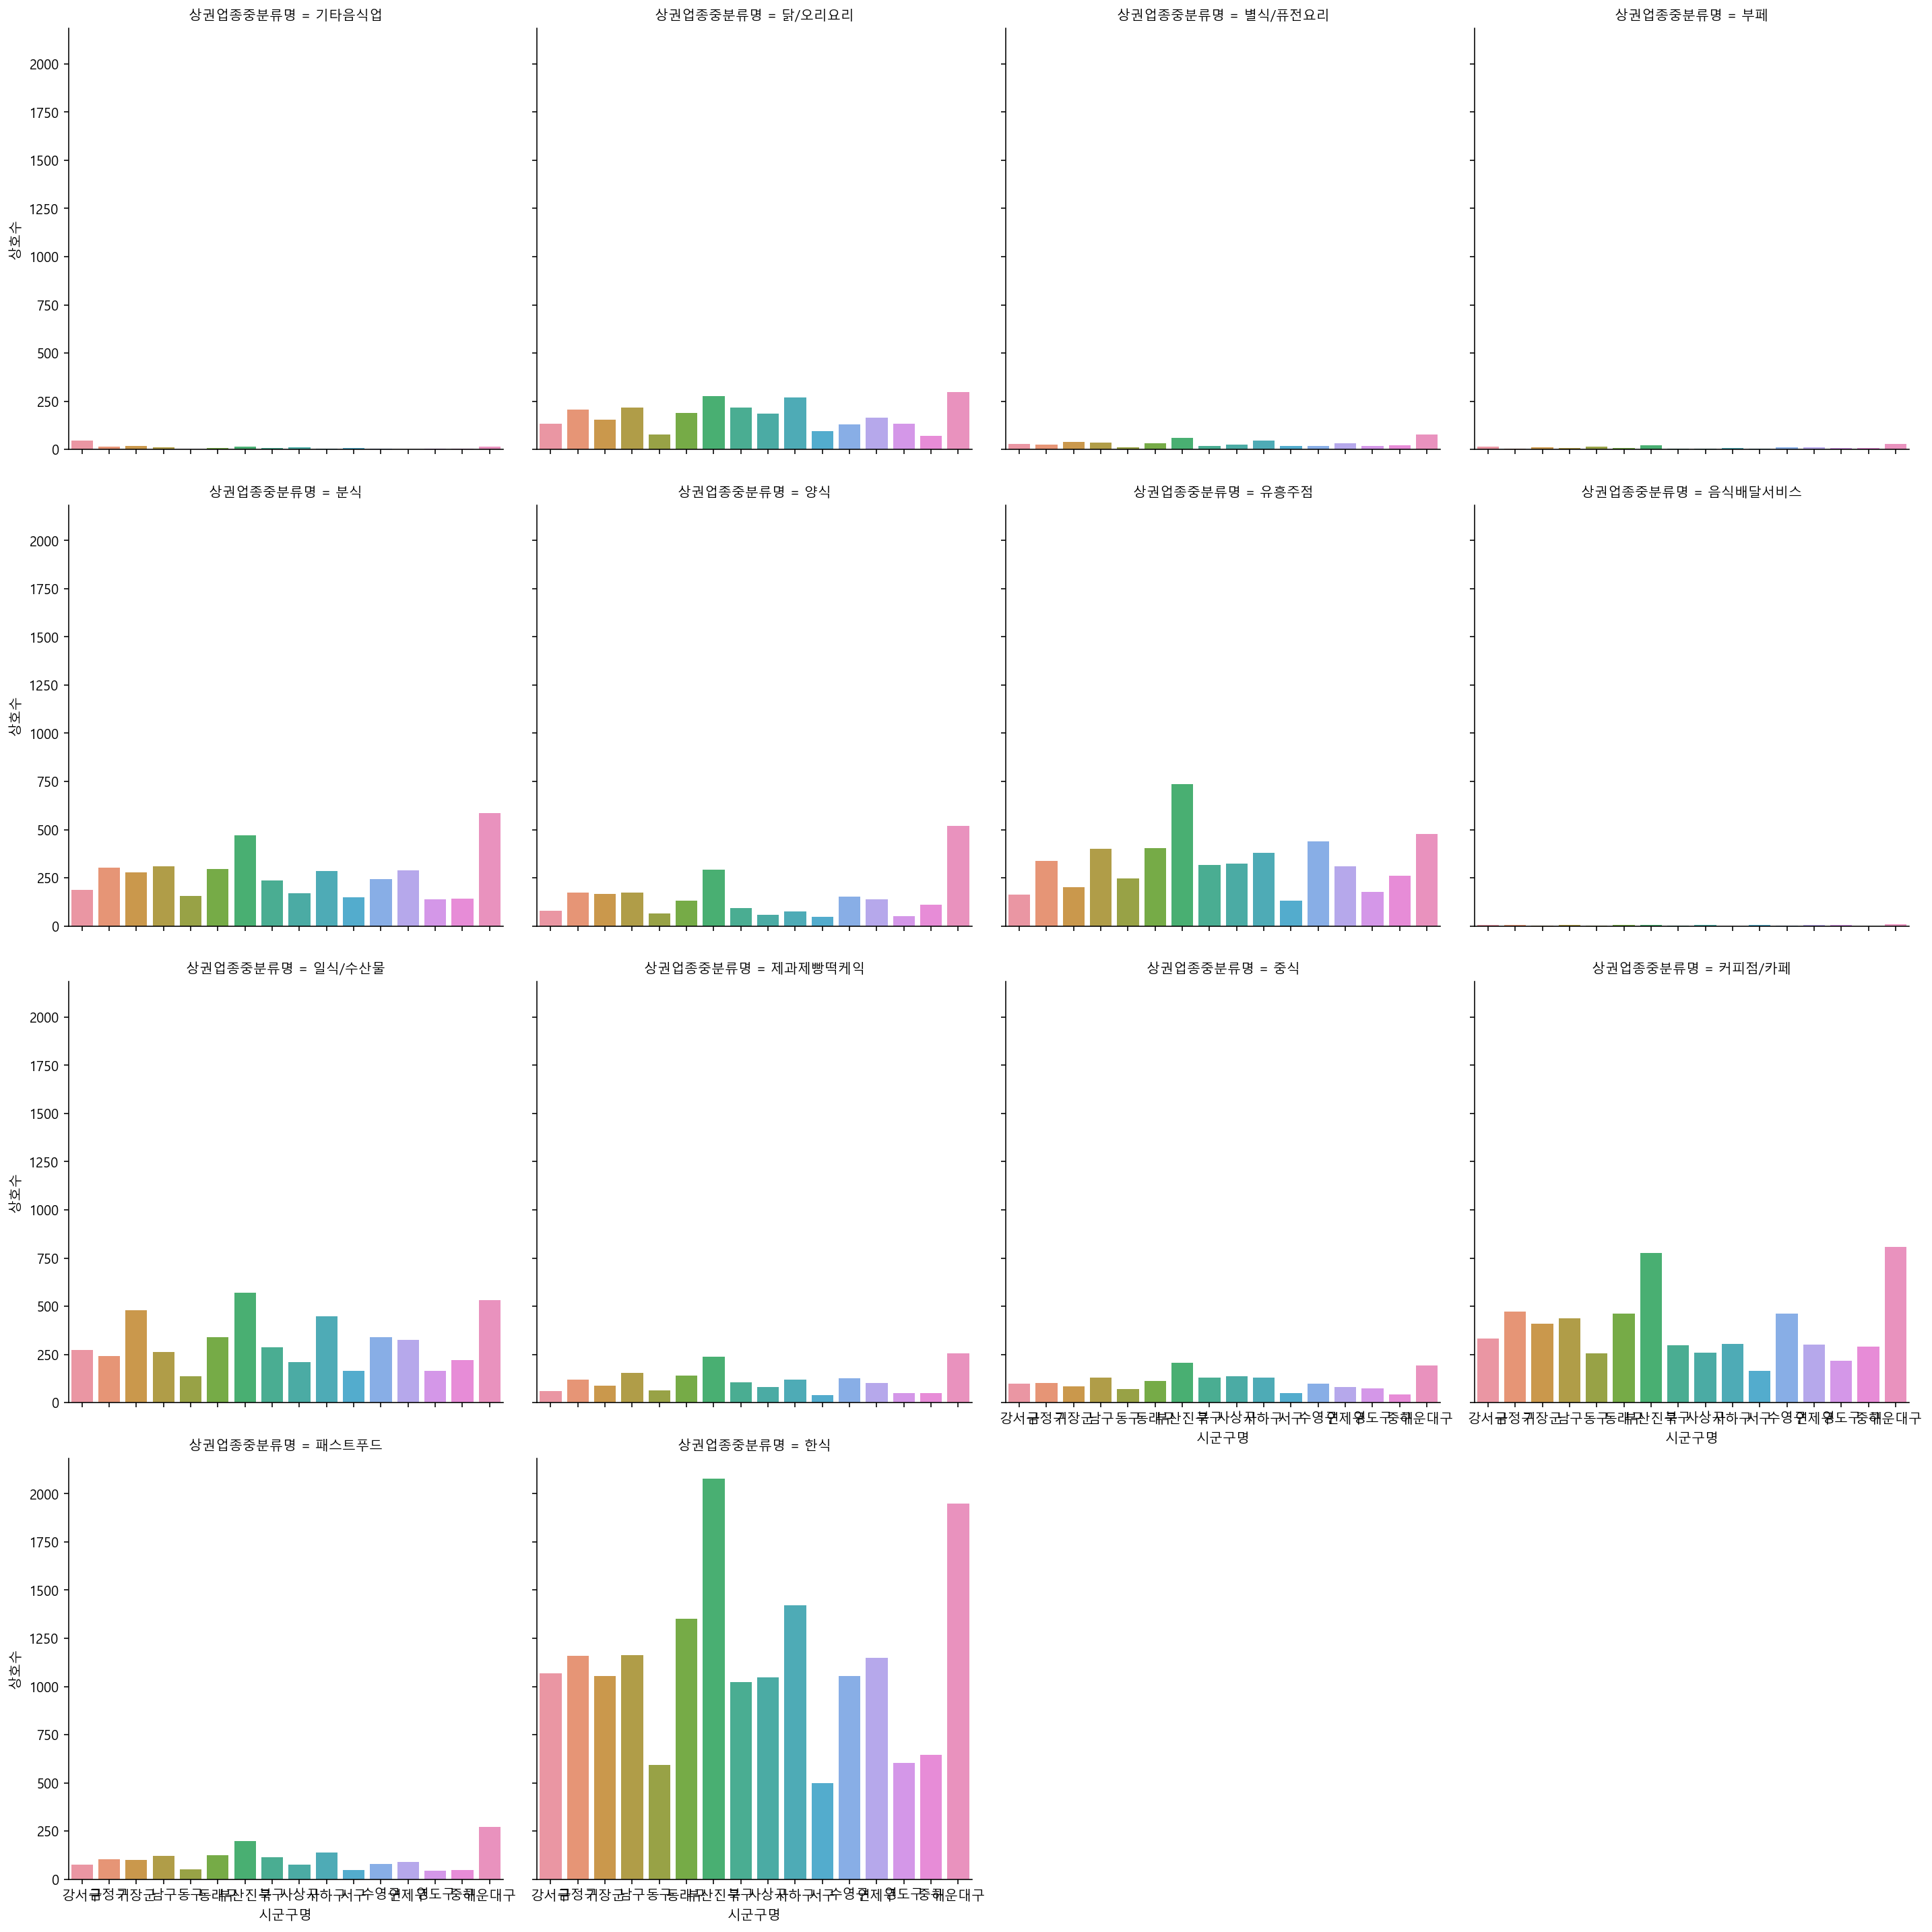

In [99]:
# catplot을 사용하여 서브프롯을 그립니다.

sns.catplot(data=food, x="시군구명", y="상호수", kind="bar", col="상권업종중분류명", col_wrap=4)


## 구별 학원수 비교
* 주거나 입지로 문화시설이나 학원, 교육 등을 고려하게 됩니다.
* 사교육이 발달한 지역으로 대치동이나 목동을 꼽는데 이 지역에 학원이 많이 분포 되어 있는지 알아봅니다.

### 서브셋 만들고 집계하기

In [100]:
# 학원의 분류명을 알아보기 위해 "상권업종대분류명"의 unique 값을 추출합니다.

df["상권업종대분류명"].unique()

array(['음식', '숙박', '소매', '생활서비스', '학문/교육', '관광/여가/오락', '부동산', '스포츠'],
      dtype=object)

In [101]:
# "시도명"이 "서울특별시"이고 "상권업종대분류명"이 "학문/교육" 인 데이터를 서브셋으로 가져옵니다.
# 재사용을 위해 서브셋을 df_academy 에 저장합니다.

df_academy = df[(df["시도명"]=="부산광역시") & (df["상권업종대분류명"] == "학문/교육")].copy()
df_academy

상호명 상권업종대분류명   상권업종중분류명     상권업종소분류명    시도명  시군구명  행정동명   법정동명  \
21          김극무영어    학문/교육      학원-어학    학원-외국어/어학  부산광역시   동래구  사직2동    사직동   
34         탑국어교습소    학문/교육  학원-보습교습입시        학원-입시  부산광역시  부산진구  개금3동    개금동   
49       현대아카데미학원    학문/교육  학원-보습교습입시        학원-입시  부산광역시    남구  문현1동    문현동   
66         대림단과학원    학문/교육  학원-보습교습입시        학원-입시  부산광역시    중구   대청동  대청동2가   
86      박병규영어전문학원    학문/교육  학원-보습교습입시        학원-입시  부산광역시   금정구  구서1동    구서동   
...           ...      ...        ...          ...    ...   ...   ...    ...   
136487    수학사랑교습소    학문/교육  학원-보습교습입시        학원-입시  부산광역시   수영구  남천1동    남천동   
136488  한솔플러스수학교실    학문/교육  학원-보습교습입시        학원-입시  부산광역시  부산진구  가야1동    가야동   
136492     탑스포츠스쿨    학문/교육  학원-보습교습입시        학원-입시  부산광역시  부산진구  양정1동    양정동   
136503     피아노숲음악    학문/교육  학원-음악미술무용  피아노/바이올린/기타  부산광역시  부산진구  당감1동    당감동   
136511         카페    학문/교육       학원기타       학원(종합)  부산광역시   동래구   명륜동    명륜동   

       대지구분명  지번본번지                   지번주소                 도로명  건물본번지  \
21        대지   1017     부산광역시 동래구 사직동 1017       부산광역시 동래구 사직로     80   
34        대지    447  부산광역시 부산진구 개금동 447-16     부산광역시 부산진구 백양대로    314   
49        대지     73      부산광역시 남구 문현동 73-1   부산광역시 남구 진남로198번길      9   
66        대지      9     부산광역시 중구 대청동2가 9-9    부산광역시 중구 대청로99번길      8   
86        대지     86    부산광역시 금정구 구서동 86-87   부산광역시 금정구 수림로50번길    198   
...      ...    ...                    ...                 ...    ...   
136487    대지     17    부산광역시 수영구 남천동 17-13  부산광역시 수영구 남천동로16번길     10   
136488    대지     50    부산광역시 부산진구 가야동 50-1     부산광역시 부산진구 가야대로    613   
136492    대지    507  부산광역시 부산진구 양정동 507-21      부산광역시 부산진구 동평로    364   
136503    대지    499   부산광역시 부산진구 당감동 499-5  부산광역시 부산진구 당감로17번길     85   
136511    대지     98    부산광역시 동래구 명륜동 98-17       부산광역시 동래구 시실로     54   

                        도로명주소          경도         위도  
21           부산광역시 동래구 사직로 80  129.057535  35.196642  
34        부산광역시 부산진구 백양대로 314  129.017191  35.154342  
49      부산광역시 남구 진남로198번길 9-1  129.079620  35.144464  
66         부산광역시 중구 대청로99번길 8  129.030905  35.103469  
86      부산광역시 금정구 수림로50번길 198  129.090212  35.248145  
...                       ...         ...        ...  
136487  부산광역시 수영구 남천동로16번길 10  129.109977  35.142288  
136488    부산광역시 부산진구 가야대로 613  129.039159  35.155697  
136492     부산광역시 부산진구 동평로 364  129.064923  35.174574  
136503  부산광역시 부산진구 당감로17번길 85  129.035320  35.161941  
136511       부산광역시 동래구 시실로 54  129.088526  35.214900  

[8462 rows x 16 columns]

In [102]:
# df_academy 에서 "상호명"으로 빈도수를 구합니다.

df_academy["상호명"].value_counts().head(10)

학원         55
공부방        45
해법수학       20
윤선생영어교실    15
해법영어교습소    14
해법영어교실     14
해법수학교습소    14
뮤엠영어       12
해동검도       11
해법영어       11
Name: 상호명, dtype: int64

In [103]:
# "시군구명" 으로 빈도수를 구합니다.

df_academy["시군구명"].value_counts()

해운대구    1183
사하구      967
부산진구     907
동래구      802
남구       673
금정구      605
수영구      552
북구       548
연제구      501
기장군      413
사상구      407
강서구      290
영도구      202
서구       202
동구       123
중구        87
Name: 시군구명, dtype: int64

In [104]:
# "상권업종소분류명"으로 빈도수를 구하고 위에서 30개만 봅니다.

academy_count = df_academy["상권업종소분류명"].value_counts().head(30)
academy_count

학원-입시          2160
학원-외국어/어학      1116
학원(종합)         1092
어린이집            939
피아노/바이올린/기타     701
서예/서화/미술        441
학원-기타           379
독서실             259
태권도장            242
학습지보급           127
학원-어린이영어        114
컴퓨터학원            93
학원-스포츠/재즈댄스      77
고시원              62
합기도장             50
학원-무용            46
검도도장             44
유아교육기관기타         42
실내놀이터-유아         36
놀이방              30
학원-간호조무사         28
학원-자동차운전         26
학원-공예            26
학원-요리            24
유도장              22
운동/코치학교          20
학원-바둑            19
학원-미용            17
운전연수전문           16
학원-가요            15
Name: 상권업종소분류명, dtype: int64

In [105]:
# "상권업종소분류명"으로 빈도수를 구하고
# 빈도수가 1000개 이상인 데이터만 따로 봅니다.

academy_count_1000 = academy_count[academy_count > 1000]
academy_count_1000

학원-입시        2160
학원-외국어/어학    1116
학원(종합)       1092
Name: 상권업종소분류명, dtype: int64

In [106]:
# "시군구명", "상권업종소분류명" 으로 그룹화를 하고 "상호명"으로 빈도수를 계산합니다.

academy_group = df_academy.groupby(["시군구명", "상권업종소분류명"])["상호명"].count()
academy_group

시군구명  상권업종소분류명   
강서구   검도도장            1
      놀이방             1
      독서실             7
      서예/서화/미술       22
      실내놀이터-유아        1
                     ..
해운대구  학원-주산암산부기속셈     2
      학원-중장비          1
      학원-펜글씨/한문       2
      학원-편입           1
      합기도장            3
Name: 상호명, Length: 544, dtype: int64

### seaborn으로 시각화 하기

In [107]:
# 위에서 구한 결과를 시군구명, 상호수로 barplot을 그립니다.

t = academy_group.reset_index()
t = t.rename(columns={"상호명":"상호수"})

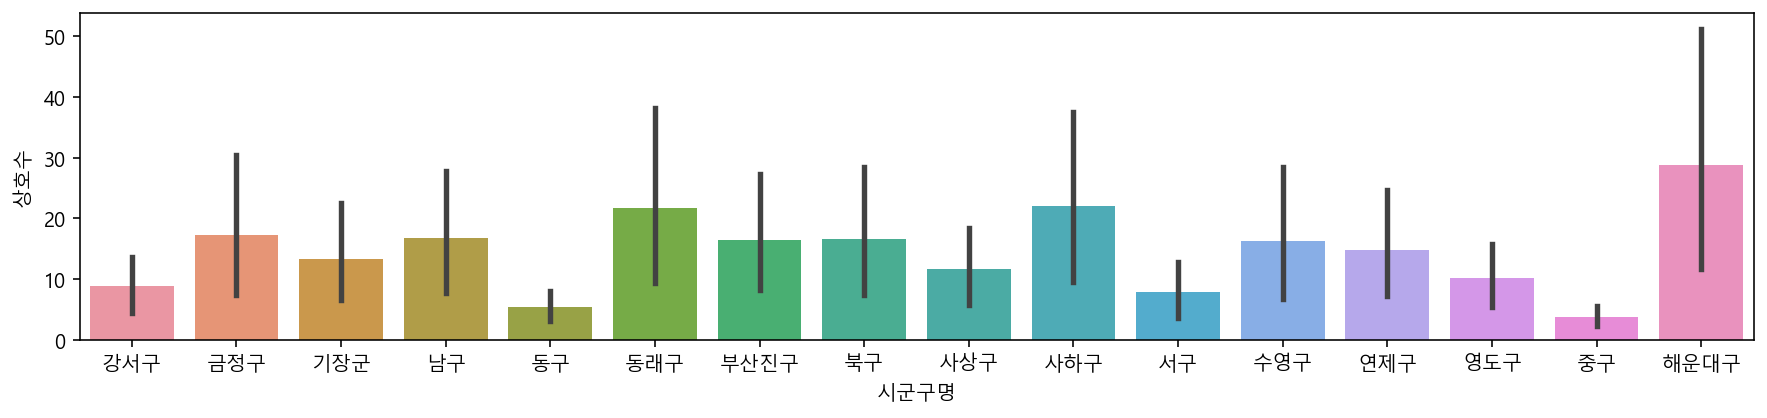

In [108]:
plt.figure(figsize=(15,3))
sns.barplot(data=t, x="시군구명", y="상호수")

###  isin 을 사용해 서브셋 만들기
* 상권업종소분류명을 빈도수로 계산했을 때 1000개 이상인 데이터만 가져와서 봅니다.

In [109]:
academy_count_1000

학원-입시        2160
학원-외국어/어학    1116
학원(종합)       1092
Name: 상권업종소분류명, dtype: int64

In [110]:
# isin 으로 빈도수로 계산했을 때 1000개 이상인 데이터만 가져와서 봅니다.
# 서브셋을 df_academy_selected 에 저장합니다.
print(df_academy.shape)
df_academy_selected = df_academy[df_academy["상권업종소분류명"].isin(academy_count_1000.index)].copy()
df_academy_selected.shape

(8462, 16)


(4368, 16)

In [111]:
df_academy_selected["상권업종소분류명"].value_counts()

학원-입시        2160
학원-외국어/어학    1116
학원(종합)       1092
Name: 상권업종소분류명, dtype: int64

In [112]:
# df_academy_selected 의 "시군구명"으로 빈도수를 셉니다.

df_academy_selected["시군구명"].value_counts()

해운대구    683
사하구     497
동래구     443
부산진구    440
금정구     355
남구      325
수영구     321
북구      298
연제구     245
기장군     208
사상구     170
서구      111
강서구     105
영도구      93
동구       45
중구       29
Name: 시군구명, dtype: int64

In [115]:
df_academy_selected.loc[df_academy_selected["법정동명"]=="온천동", "상권업종소분류명"].value_counts()

학원-입시        36
학원(종합)       17
학원-외국어/어학    17
Name: 상권업종소분류명, dtype: int64

In [116]:
df_academy_selected.loc[df_academy_selected["법정동명"]=="명륜동", "상권업종소분류명"].value_counts()

학원-입시        29
학원(종합)       19
학원-외국어/어학    15
Name: 상권업종소분류명, dtype: int64

In [117]:
# df_academy_selected 로 위에서 했던 그룹화를 복습해 봅니다.
# "상권업종소분류명", "시군구명" 으로 그룹화를 하고 "상호명"으로 빈도수를 계산합니다.
# g 라는 변수에 담아 재사용 할 예정입니다.
g = df_academy_selected.groupby(["상권업종소분류명", "시군구명"])["상호명"].count()
g

상권업종소분류명   시군구명
학원(종합)     강서구      31
           금정구      80
           기장군      67
           남구       74
           동구       17
           동래구      90
           부산진구    125
           북구       93
           사상구      62
           사하구     110
           서구       28
           수영구      75
           연제구      52
           영도구      35
           중구        7
           해운대구    146
학원-외국어/어학  강서구      38
           금정구      93
           기장군      54
           남구       93
           동구        8
           동래구     105
           부산진구    128
           북구       66
           사상구      40
           사하구     112
           서구       30
           수영구      75
           연제구      63
           영도구      18
           중구        6
           해운대구    187
학원-입시      강서구      36
           금정구     182
           기장군      87
           남구      158
           동구       20
           동래구     248
           부산진구    187
           북구      139
           사상구      68
           사하구     275
           서구     

### Pandas 의 plot 으로 시각화

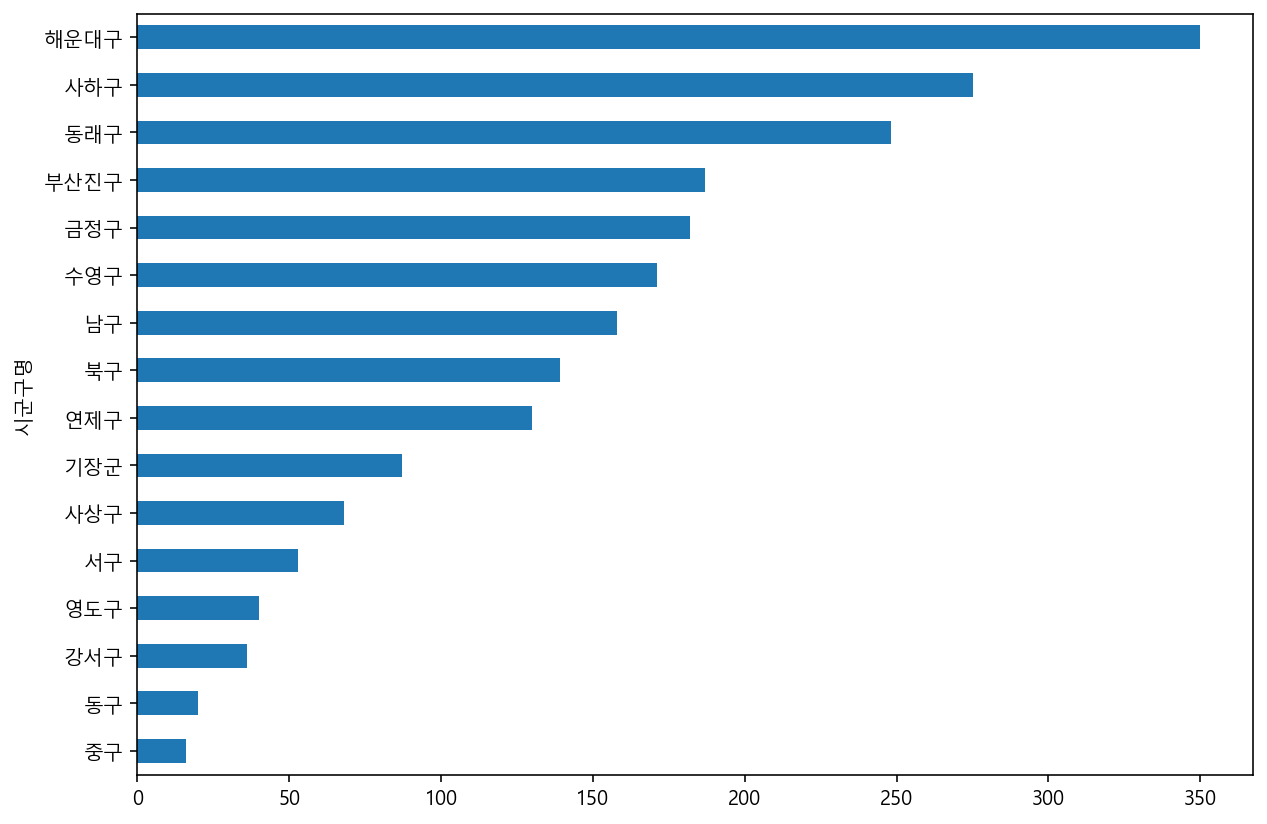

In [118]:
# 상권업종소분류명이 index 로 되어 있습니다.
# loc를 통해 index 값을 가져올 수 있습니다.
# 그룹화된 결과 중 "학원-입시" 데이터만 가져옵니다. 
g.loc["학원-입시"].sort_values().plot.barh(figsize=(10,7))

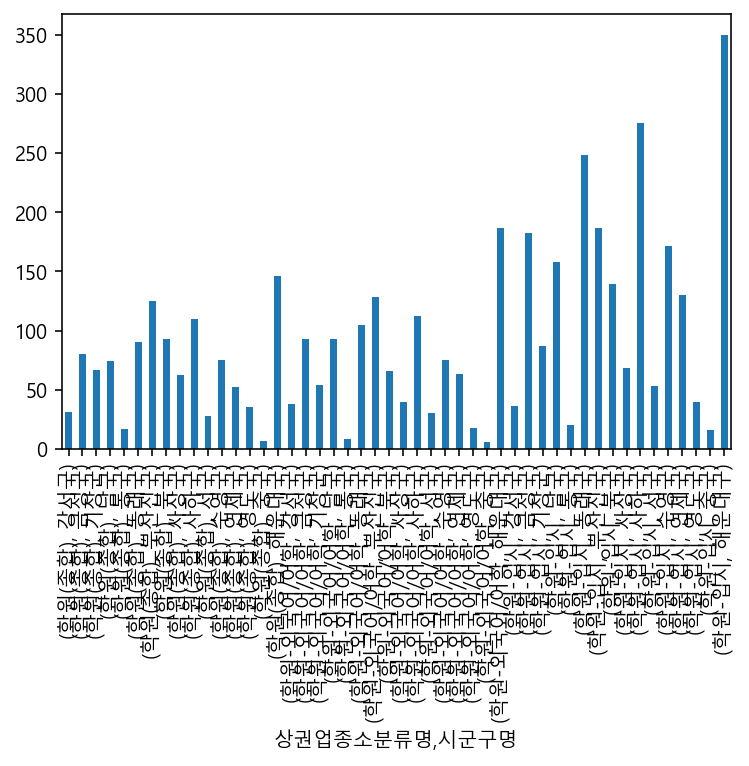

In [119]:
# 그룹화된 데이터를 시각화 하게 되면 멀티인덱스 값으로 표현이 되어 보기가 어렵습니다.
# 다음 셀부터 이 그래프를 개선해 봐요!

g.plot.bar()

### unstack() 이해하기
* https://pandas.pydata.org/docs/user_guide/reshaping.html
<img src="https://pandas.pydata.org/docs/_images/reshaping_stack.png">
<img src="https://pandas.pydata.org/docs/_images/reshaping_unstack.png">

In [120]:
# 위에서 그룹화한 데이터를 unstack() 하고 iloc로 위에서 5개 왼쪽에서 5개만 서브셋을 봅니다.

g.unstack().iloc[:5, :5]

시군구명       강서구  금정구  기장군   남구  동구
상권업종소분류명                         
학원(종합)      31   80   67   74  17
학원-외국어/어학   38   93   54   93   8
학원-입시       36  182   87  158  20

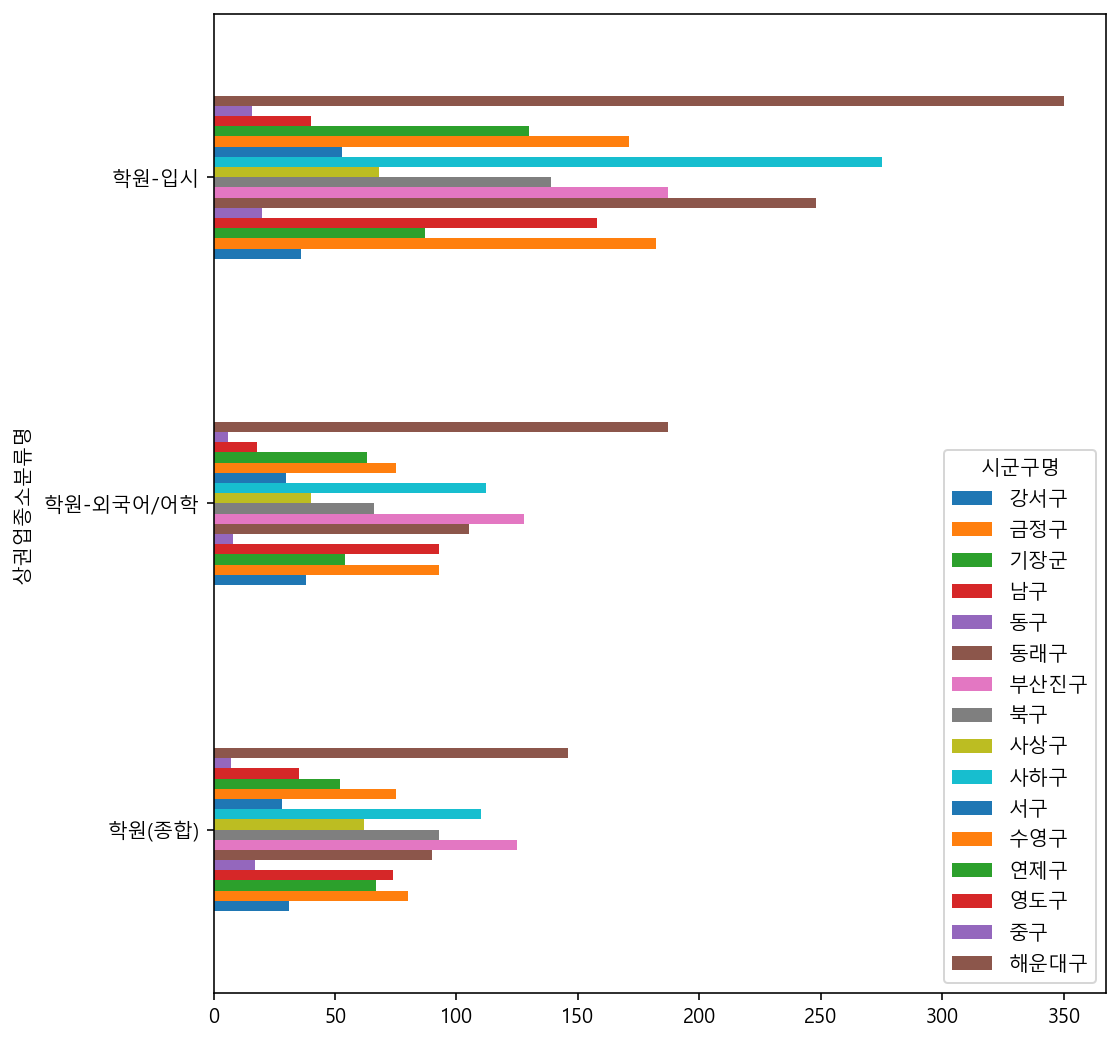

In [121]:
# 그룹화된 결과에 unstack 을 사용하면 마지막 인덱스 컬럼이 컬럼으로 바뀝니다.

g.unstack().plot.barh(figsize=(8,9))

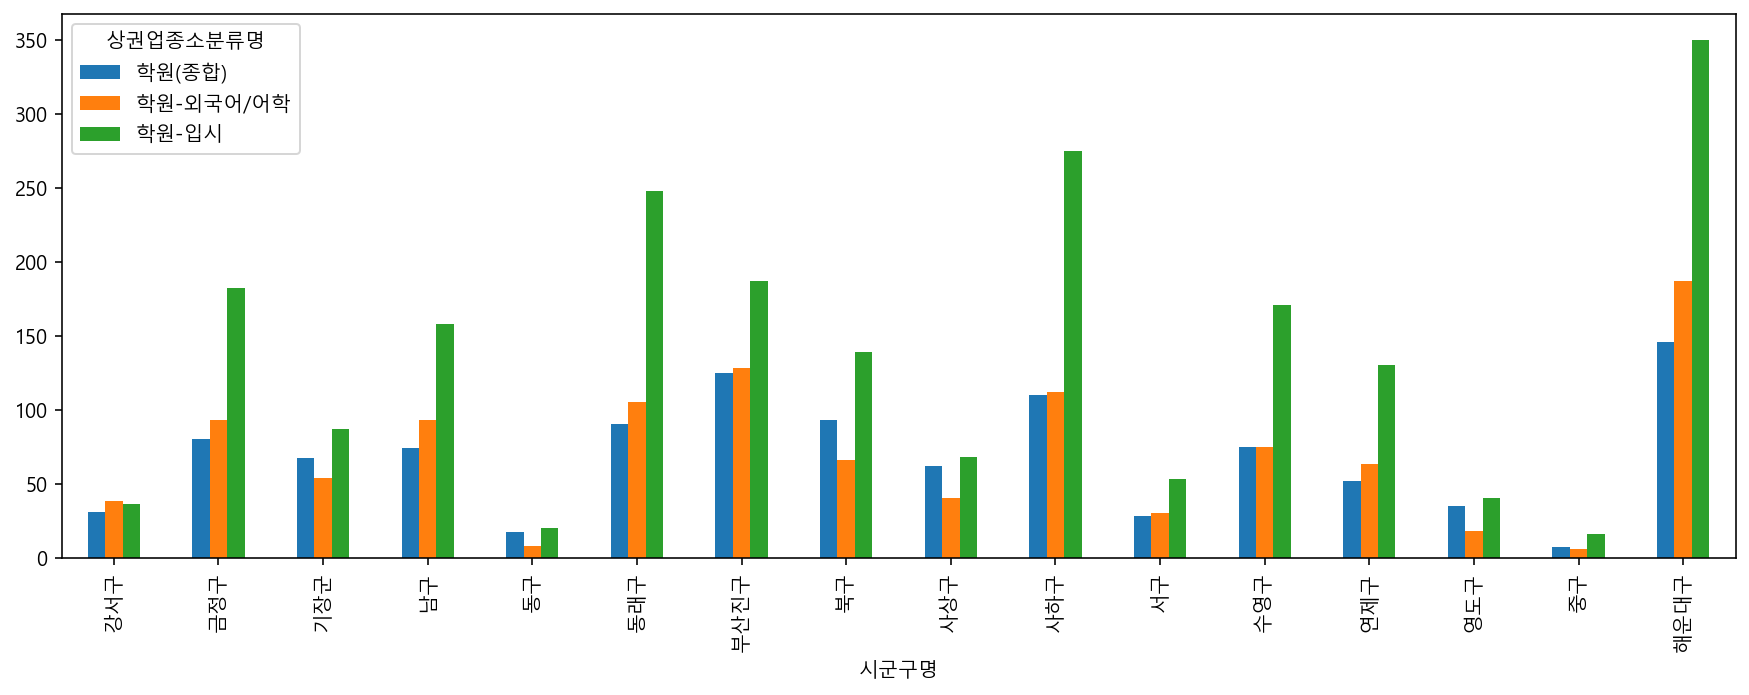

In [122]:
# 구별로 학원 수 시각화 하기 unstack() 값에 transpose 를 하면 행과 열이 바뀝니다.

g.unstack().T.plot.bar(figsize=(15,5))

In [123]:
# 그룹화 한 값의 인덱스를 출력해 봅니다.
g.index

MultiIndex([(   '학원(종합)',  '강서구'),
            (   '학원(종합)',  '금정구'),
            (   '학원(종합)',  '기장군'),
            (   '학원(종합)',   '남구'),
            (   '학원(종합)',   '동구'),
            (   '학원(종합)',  '동래구'),
            (   '학원(종합)', '부산진구'),
            (   '학원(종합)',   '북구'),
            (   '학원(종합)',  '사상구'),
            (   '학원(종합)',  '사하구'),
            (   '학원(종합)',   '서구'),
            (   '학원(종합)',  '수영구'),
            (   '학원(종합)',  '연제구'),
            (   '학원(종합)',  '영도구'),
            (   '학원(종합)',   '중구'),
            (   '학원(종합)', '해운대구'),
            ('학원-외국어/어학',  '강서구'),
            ('학원-외국어/어학',  '금정구'),
            ('학원-외국어/어학',  '기장군'),
            ('학원-외국어/어학',   '남구'),
            ('학원-외국어/어학',   '동구'),
            ('학원-외국어/어학',  '동래구'),
            ('학원-외국어/어학', '부산진구'),
            ('학원-외국어/어학',   '북구'),
            ('학원-외국어/어학',  '사상구'),
            ('학원-외국어/어학',  '사하구'),
            ('학원-외국어/어학',   '서구'),
            ('학원-외국어/어학',  '수영구'),
            ('학원-외국어

In [124]:
# 멀티인덱스보다 컬럼으로 접근이 편하기 때문에 reset_index 를 통해 인덱스값을 컬럼으로 만들어 줍니다.
# "상호명" 컬럼은 "상호수" 이기 때문에 컬럼명을 변경해 줍니다.
t = g.reset_index()
t = t.rename(columns={"상호명":"상호수"})
t

상권업종소분류명  시군구명  상호수
0      학원(종합)   강서구   31
1      학원(종합)   금정구   80
2      학원(종합)   기장군   67
3      학원(종합)    남구   74
4      학원(종합)    동구   17
5      학원(종합)   동래구   90
6      학원(종합)  부산진구  125
7      학원(종합)    북구   93
8      학원(종합)   사상구   62
9      학원(종합)   사하구  110
10     학원(종합)    서구   28
11     학원(종합)   수영구   75
12     학원(종합)   연제구   52
13     학원(종합)   영도구   35
14     학원(종합)    중구    7
15     학원(종합)  해운대구  146
16  학원-외국어/어학   강서구   38
17  학원-외국어/어학   금정구   93
18  학원-외국어/어학   기장군   54
19  학원-외국어/어학    남구   93
20  학원-외국어/어학    동구    8
21  학원-외국어/어학   동래구  105
22  학원-외국어/어학  부산진구  128
23  학원-외국어/어학    북구   66
24  학원-외국어/어학   사상구   40
25  학원-외국어/어학   사하구  112
26  학원-외국어/어학    서구   30
27  학원-외국어/어학   수영구   75
28  학원-외국어/어학   연제구   63
29  학원-외국어/어학   영도구   18
30  학원-외국어/어학    중구    6
31  학원-외국어/어학  해운대구  187
32      학원-입시   강서구   36
33      학원-입시   금정구  182
34      학원-입시   기장군   87
35      학원-입시    남구  158
36      학원-입시    동구   20
37      학원-입시   동래구  248
38      학원-입시  부산진구  187
39      학원-입시    북구  139
40      학원-입시   사상구   68
41      학원-입시   사하구  275
42      학원-입시    서구   53
43      학원-입시   수영구  171
44      학원-입시   연제구  130
45      학원-입시   영도구   40
46      학원-입시    중구   16
47      학원-입시  해운대구  350

### 같은 그래프를 seaborn 으로 그리기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png">

이미지 출처 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

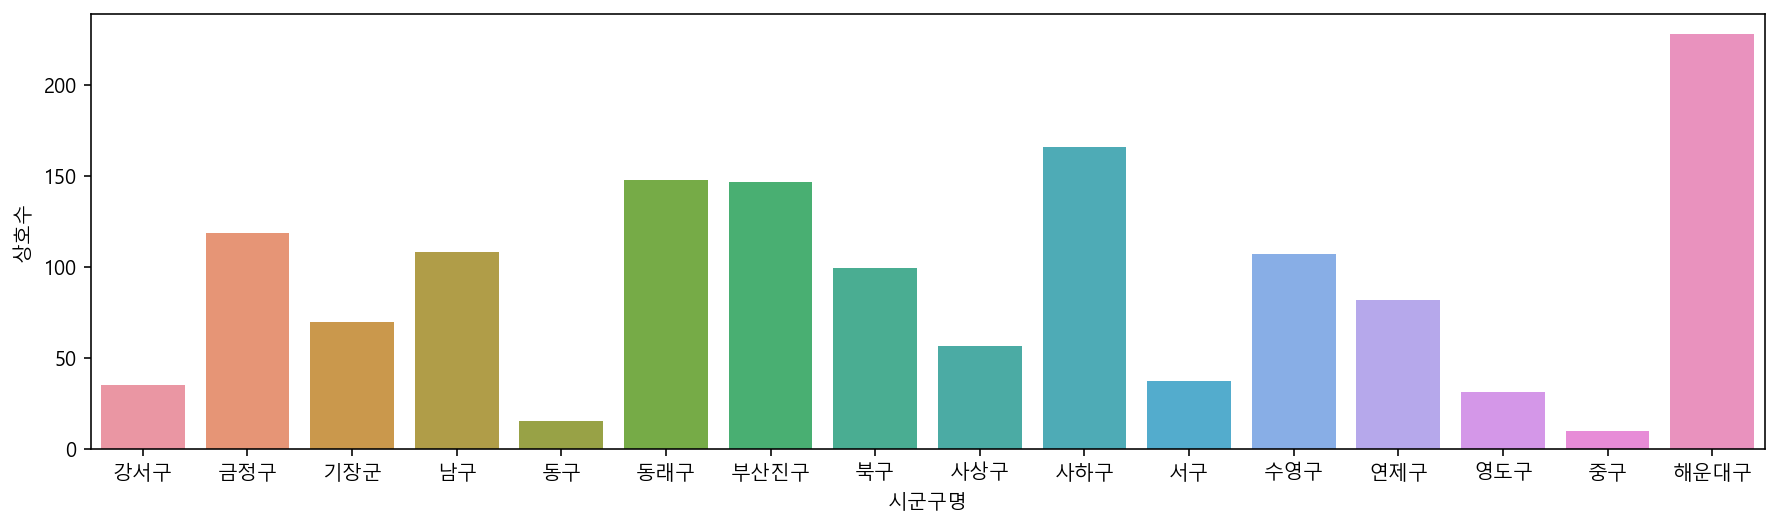

In [125]:
# x축에 시군구명을 y축에 상호수를 막대그래프로 그립니다. 
# 상권업종소분류명 으로 색상을 다르게 표현합니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=t, x="시군구명", y="상호수", ci=None)

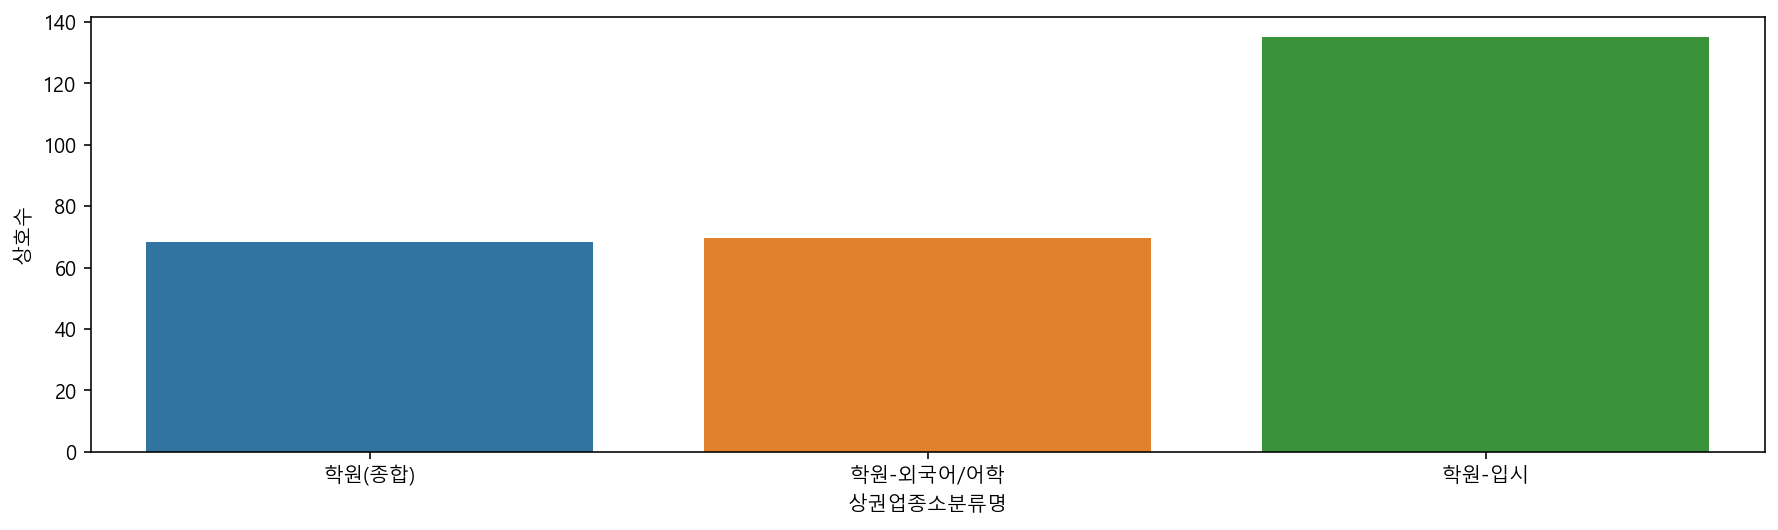

In [126]:
# x축에 상권업종소분류명을 y축에 상호수를 막대그래프로 그립니다. 
# 시군구명 으로 색상을 다르게 표현합니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=t, x="상권업종소분류명", y="상호수", ci=None)

(16, 3)


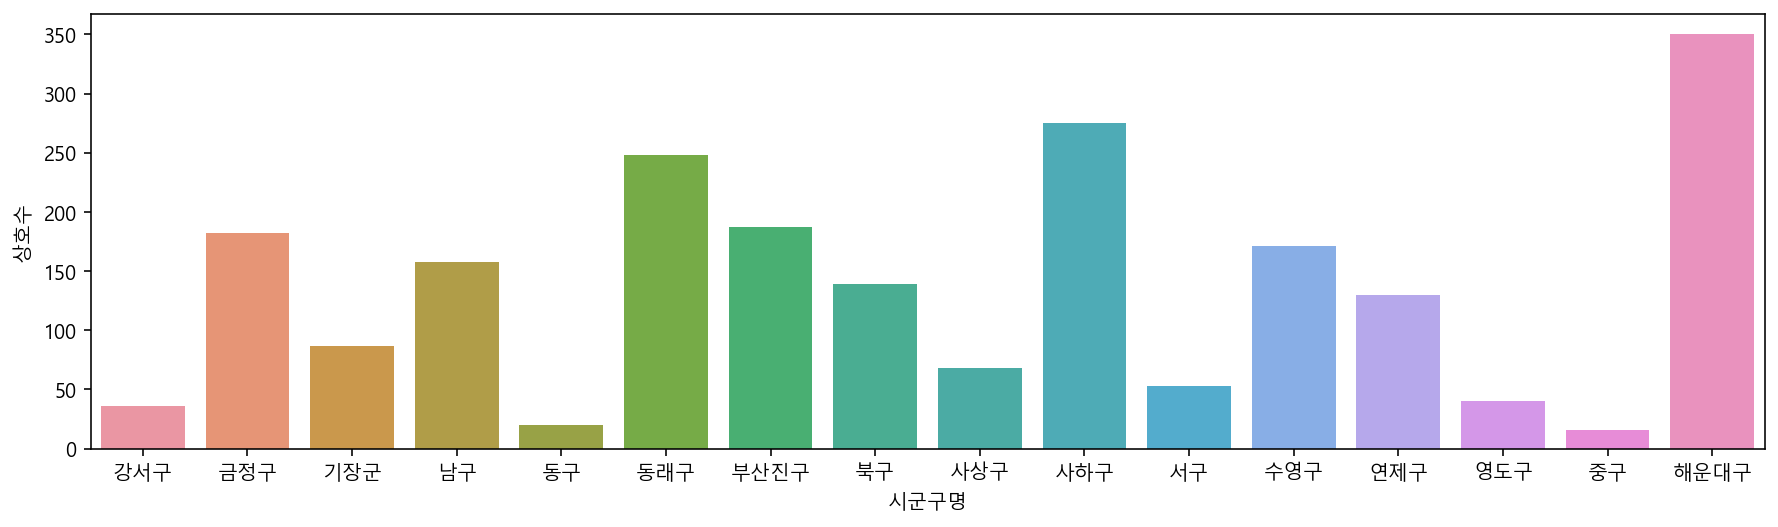

In [127]:
# "상권업종소분류명"이 "학원-입시" 인 서브셋만 가져와서 시각화 합니다.

academy_sub = t[t["상권업종소분류명"] == "학원-입시"].copy()
print(academy_sub.shape)
plt.figure(figsize=(15, 4))
sns.barplot(data=academy_sub, x="시군구명", y="상호수")

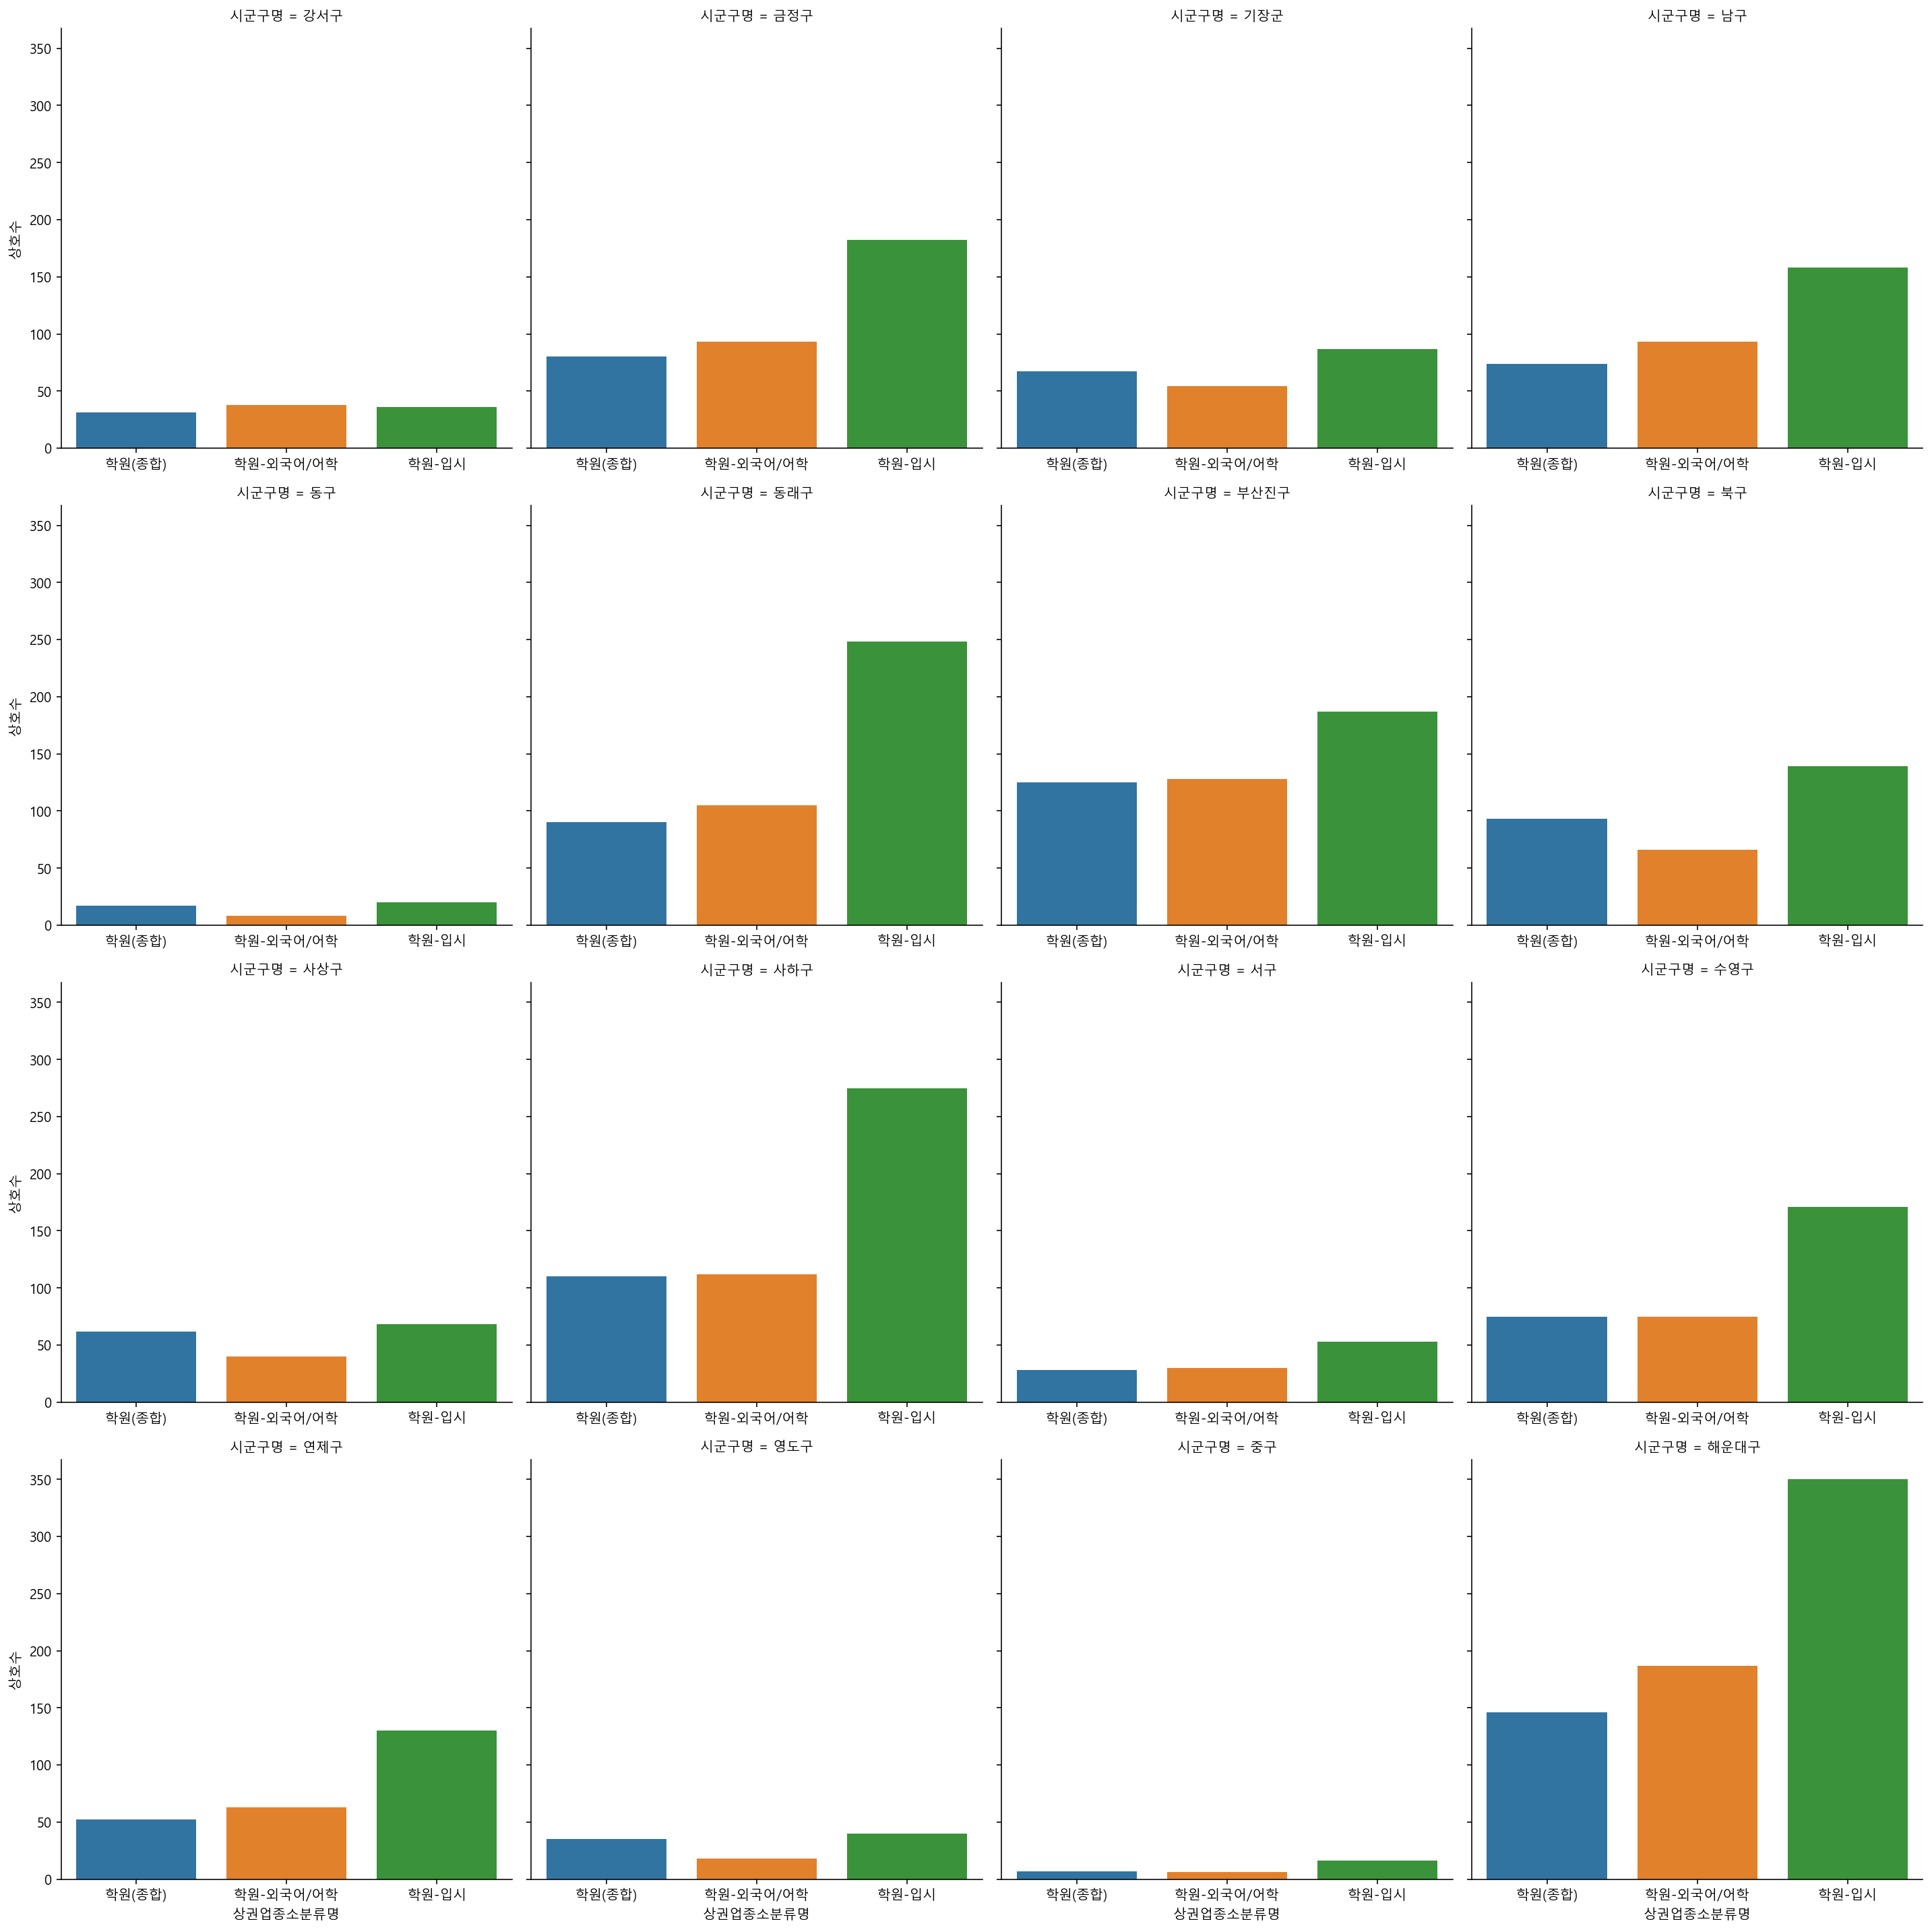

In [128]:
# catplot을 통해 서브플롯을 그립니다.

sns.catplot(data=t, x="상권업종소분류명", y="상호수", kind="bar", col="시군구명", col_wrap=4, sharex=False)

### 경도와 위도를 scatterplot 으로 표현하기

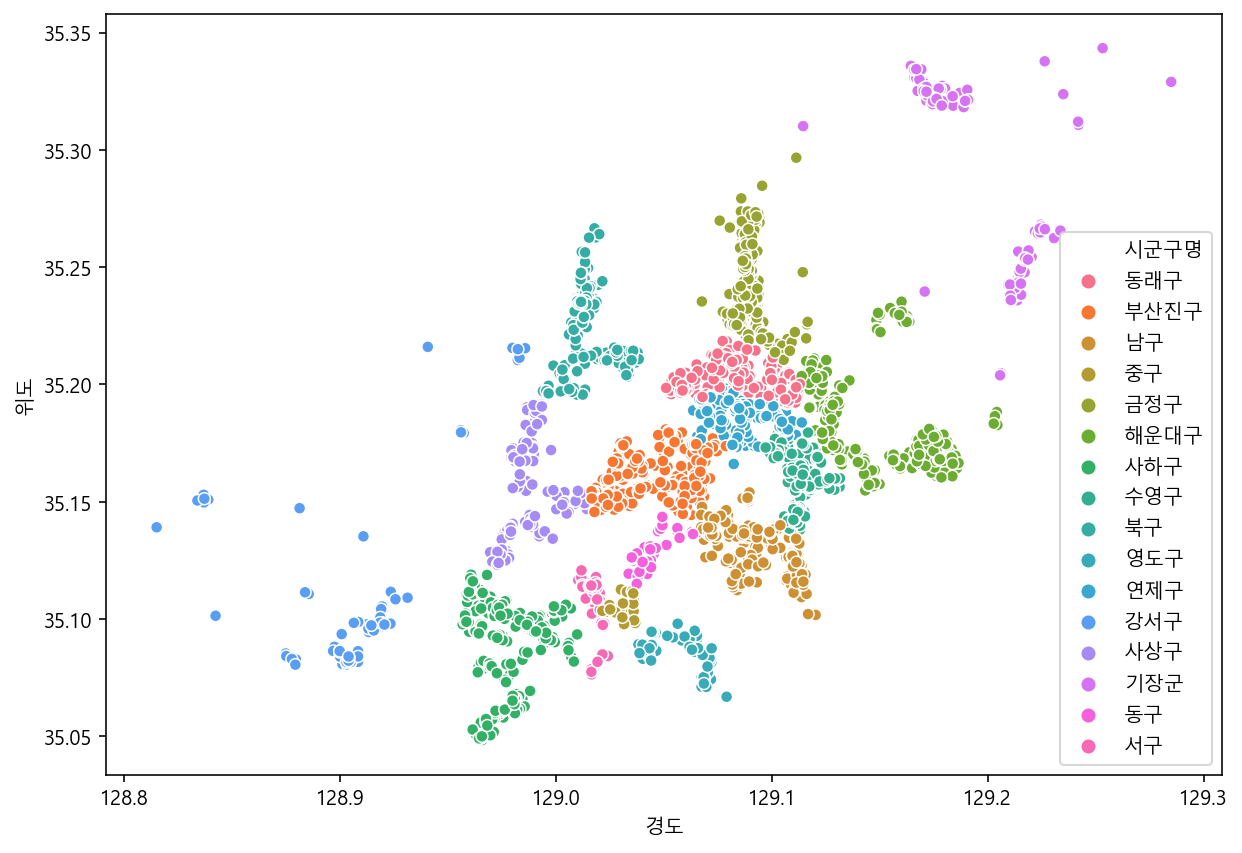

In [129]:
# scatterplot 으로 경도와 위도를 표현하고 시군구명으로 색상을 다르게 표현합니다.
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_academy_selected, x="경도", y='위도', hue="시군구명")

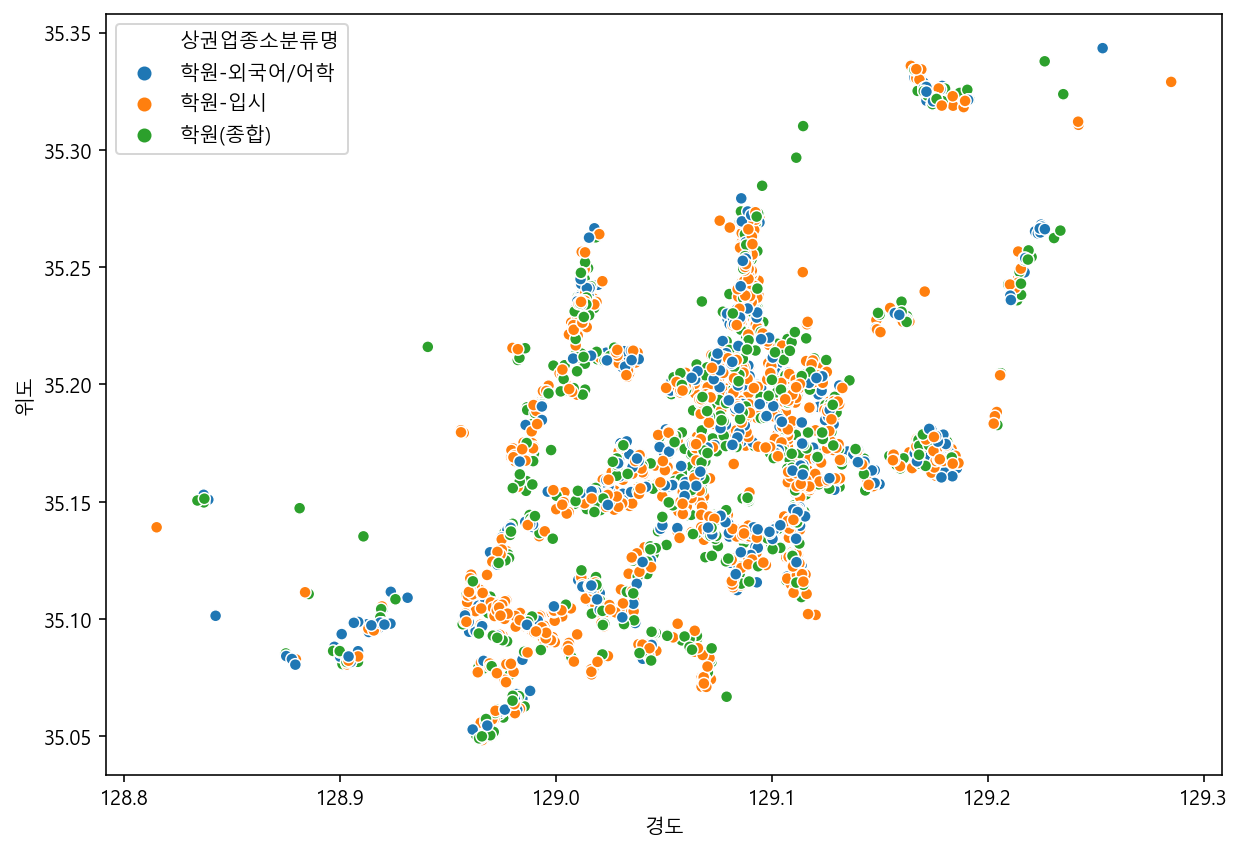

In [130]:
# scatterplot 으로 경도와 위도를 표현하고 상권업종소분류명으로 색상을 다르게 표현합니다.

plt.figure(figsize=(10,7))
sns.scatterplot(data=df_academy_selected, x="경도", y='위도', hue="상권업종소분류명")

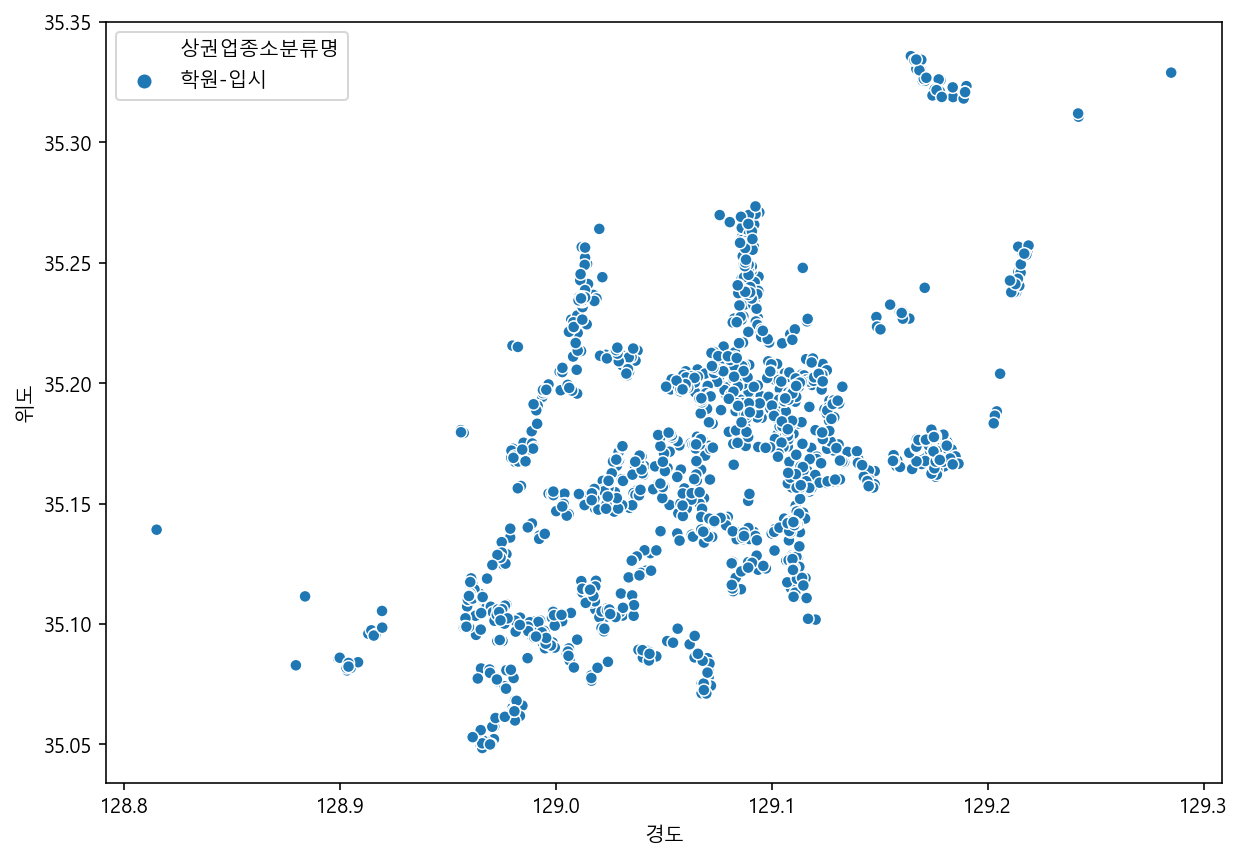

In [131]:
# "상권업종소분류명"이 "학원-입시" 인 데이터만 그려봅니다.
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_academy_selected[df_academy_selected["상권업종소분류명"]=="학원-입시"], 
                x="경도", y='위도', hue="상권업종소분류명")

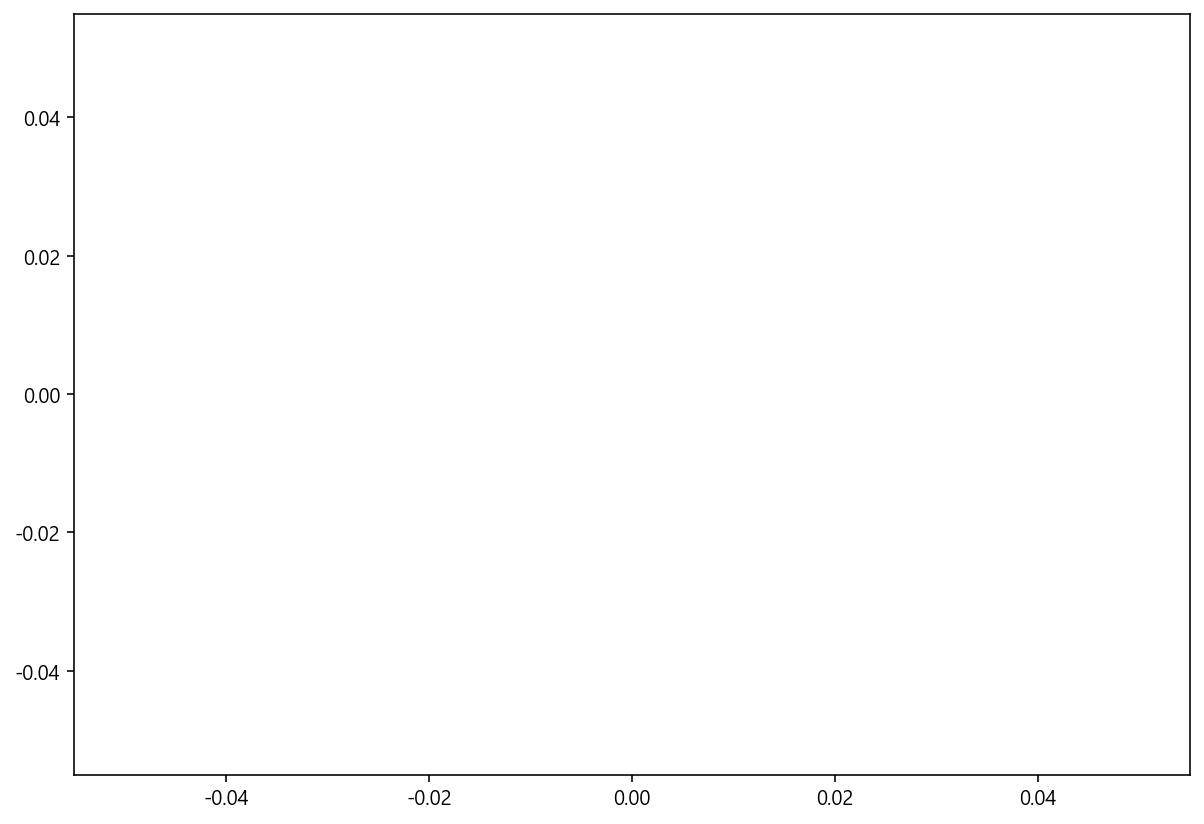

In [132]:
# "상권업종소분류명"이 "어린이집" 인 데이터만 그려봅니다.
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_academy_selected[df_academy_selected["상권업종소분류명"]=="어린이집"], 
                x="경도", y='위도', hue="상권업종소분류명")

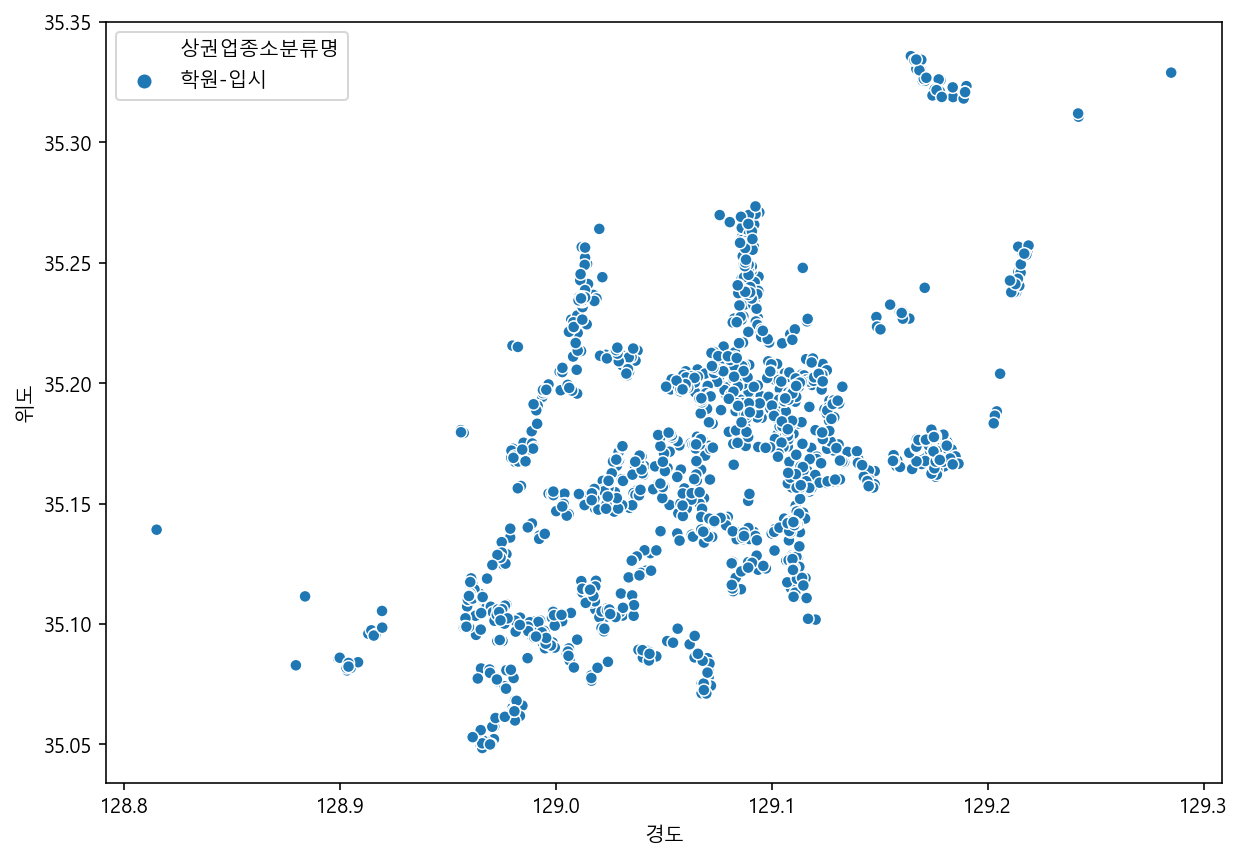

In [133]:
# 어린이집과 학원-입시를 비교해 봅니다.

plt.figure(figsize=(10,7))
sns.scatterplot(data=df_academy_selected[df_academy_selected["상권업종소분류명"].isin(["어린이집", "학원-입시"])],
                x="경도", y='위도', hue="상권업종소분류명")


## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://t1.daumcdn.net/cfile/tistory/99576B4A5B751DC902">

검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.


`conda install -c conda-forge folium`

### Folium 사용예제
* 예제목록 : http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/
* Quickstart : https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb

In [134]:
# 위에서 그렸던 어린이집과 학원-입시에 대한 상호 데이터를 지도에 시각화 해봅니다.
import folium

In [135]:
# 경도와 위도의 평균을 구해서 long, lat 변수에 담습니다.
long = df_academy_selected["경도"].mean()
lat = df_academy_selected["위도"].mean()

In [136]:
m = folium.Map(location=[lat, long], zoom_start=12)
m

In [137]:
# "상권업종소분류명"에 "어린이집", "학원-입시"가 들어가는 데이터만 isin을 통해 가져옵니다.

df_m = df_academy_selected[df_academy_selected["상권업종소분류명"].isin(["어린이집", "학원-입시"])]
df_m = df_m.sample(1000)
df_m.shape

(1000, 16)

In [138]:
df_m.iloc[0]

상호명                             해법수학
상권업종대분류명                       학문/교육
상권업종중분류명                   학원-보습교습입시
상권업종소분류명                       학원-입시
시도명                            부산광역시
시군구명                            해운대구
행정동명                             좌4동
법정동명                              좌동
대지구분명                             대지
지번본번지                           1414
지번주소              부산광역시 해운대구 좌동 1414
도로명            부산광역시 해운대구 좌동순환로217번길
건물본번지                             19
도로명주소       부산광역시 해운대구 좌동순환로217번길 19
경도                           129.179
위도                           35.1786
Name: 98393, dtype: object

In [140]:
# folium 으로 Marker 를 지도로 표시해 봅니다.

m = folium.Map(location=[lat, long], zoom_start=12)
folium.Marker([35.1786, 129.179], popup='<i>해법수학</i>', tooltip="해법수학").add_to(m) 
m

In [176]:
# html 파일로 저장해 봅니다.
# m.save("index.html")

In [184]:
# loc를 통해 특정 상호명을 접근해 봅니다.

# df_m.loc[131944, "상호명"]

Int64Index([330068, 250611, 343827, 561729, 151079,  52394, 232557, 190303,
            330976, 333466,
            ...
            488460, 338453,  64006, 338144, 572080, 544344, 113904, 375615,
             97331, 490210],
           dtype='int64', length=1000)

In [141]:
# index 만 가져옵니다.

df_m.index

Int64Index([ 98393,  89302,   2571,  80915,   4225,  75992, 111218, 122405,
              2599,  85917,
            ...
             92729, 129101,  85130,  81308,  19991,  82038, 121105,  44896,
             79368, 105395],
           dtype='int64', length=1000)

In [142]:
# for문으로 데이터프레임을 순회하며 원하는 값을 가져옵니다.

for i in df_m.index[:10]:
    tooltip = df_m.loc[i, "상호명"] + "-" + df_m.loc[i, "도로명주소"]
    lat = df_m.loc[i, "위도"]
    long = df_m.loc[i, "경도"]
    
    print(tooltip, lat, long)

해법수학-부산광역시 해운대구 좌동순환로217번길 19 35.1786148432501 129.179448987872
금서원교습소-부산광역시 남구 분포로 111 35.1282810331043 129.110840528565
베스트수학전문-부산광역시 영도구 중리로 46-5 35.0751718199225 129.068596907349
올수학과학학원-부산광역시 부산진구 당감로 36-1 35.1649512806342 129.039550887645
해법수학교습소-부산광역시 해운대구 대천로103번길 9 35.174833746791 129.172467273853
셀파수학교실수학교습소-부산광역시 해운대구 청사포로 27 35.166540199978 129.18644249242598
만덕청록단과학원-부산광역시 북구 만덕1로10번길 11 35.214388698095604 129.035787381106
윤원식독서,논술학원-부산광역시 사상구 엄궁로 39 35.1244828588553 128.97055283486299
한솔플러스수학-부산광역시 수영구 호암로55번길 5 35.1579290493705 129.107742161819
지석학원-부산광역시 부산진구 동평로 356 35.1746171726693 129.064122140584


In [158]:
# 위에서 작성해본 for문을 활용해 CircleMarker 로 표현해 봅니다.

m = folium.Map(location=[lat, long], zoom_start=12)

for i in df_m.index:
    tooltip = df_m.loc[i, "상호명"] + "-" + df_m.loc[i, "도로명주소"]
    lat = df_m.loc[i, "위도"]
    long = df_m.loc[i, "경도"]
    
    folium.CircleMarker([lat, long], tooltip=tooltip, radius=3).add_to(m) 

m